## 第一题

In [ ]:
#设测线间距为d，坡度为α，待测海域中心深度为D,开角为θ，覆盖宽度为w,重叠率为η
w = D * sin(θ/2)/cos(α+θ/2) + D * sin(θ/2)/cos(θ/2-α)
η= 1-d/cos(α)/w

In [44]:
import math

def calculate_width(D, theta, alpha):
    w = D * math.sin(theta/2) / math.cos(alpha+theta/2) + D * math.sin(theta/2) / math.cos(theta/2-alpha)
    return w

def calculate_overlap(d, alpha, width):
    eta = 1 - d / math.cos(alpha) / width
    return eta

# 设置输入参数
D = 50  # 待测海域中心深度
theta = math.radians(60)  # 开角，以弧度表示，这里假设为60度
alpha = math.radians(30)  # 坡度，以弧度表示，这里假设为30度

# 设置测线间距的范围和步长
d_start = 5
d_end = 20
d_step = 5

# 遍历不同的测线间距并计算覆盖宽度和重叠率
for d in range(d_start, d_end+1, d_step):
    width = calculate_width(D, theta, alpha)
    overlap = calculate_overlap(d, alpha, width)
    
    # 输出结果
    print("测线间距：", d)
    print("覆盖宽度：", width)
    print("重叠率：", overlap)
    print("\n")

测线间距： 5
覆盖宽度： 74.99999999999997
重叠率： 0.9230199641080499


测线间距： 10
覆盖宽度： 74.99999999999997
重叠率： 0.8460399282160997


测线间距： 15
覆盖宽度： 74.99999999999997
重叠率： 0.7690598923241496


测线间距： 20
覆盖宽度： 74.99999999999997
重叠率： 0.6920798564321995




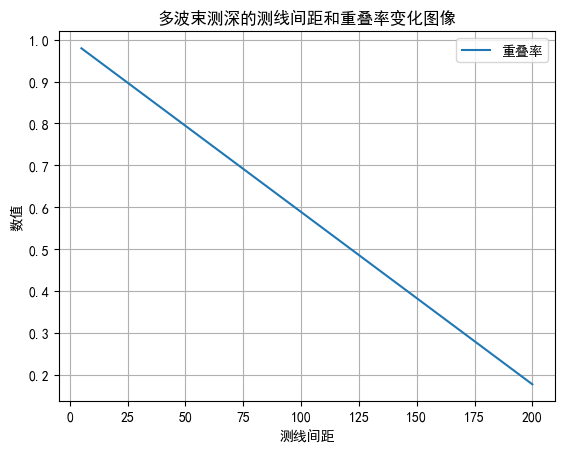

In [51]:
import math
import matplotlib.pyplot as plt

def calculate_width(D, theta, alpha):
    w = D * math.sin(theta/2) / math.cos(alpha+theta/2) + D * math.sin(theta/2) / math.cos(theta/2-alpha)
    return w

def calculate_overlap(d, alpha, width):
    eta = 1 - d / math.cos(alpha) / width
    return eta

# 设置输入参数
D = 70  # 待测海域中心深度
theta = math.radians(120)  # 开角，以弧度表示，这里假设为60度
alpha = math.radians(1.5)  # 坡度，以弧度表示，这里假设为30度

# 设置测线间距的范围和步长
d_start = 5
d_end = 200
d_step = 5

# 初始化列表来保存结果
d_values = []
width_values = []
overlap_values = []

# 遍历不同的测线间距并计算覆盖宽度和重叠率
for d in range(d_start, d_end+1, d_step):
    width = calculate_width(D, theta, alpha)
    overlap = calculate_overlap(d, alpha, width)
    
    # 将结果添加到列表中
    d_values.append(d)
    width_values.append(width)
    overlap_values.append(overlap)

# 绘制图像
# plt.plot(d_values, width_values, label='覆盖宽度')
plt.plot(d_values, overlap_values, label='重叠率')

plt.xlabel('测线间距')
plt.ylabel('数值')
plt.title('多波束测深的测线间距和重叠率变化图像')

plt.legend()
plt.grid(True)
plt.show()

# 第二题

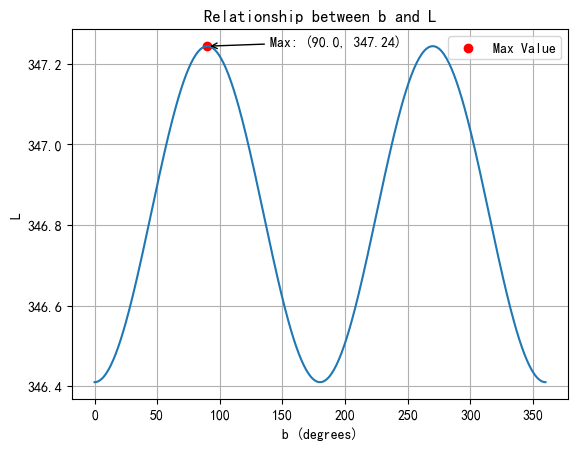

In [144]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_L(b):
    sita = np.deg2rad(120)
    a = 1.5
    D = 100
    
    tan_a = np.tan(np.deg2rad(a))
    tan_r = tan_a * np.sin(np.deg2rad(b))
    r = np.arctan(tan_r)
    
    L = D * np.sin(sita/2) / np.cos(sita/2+r) + D * np.sin(sita/2) / np.cos(sita/2-r)
    return L

# 生成b的取值范围
b_values = np.linspace(0, 360, 361)

# 计算相应的L值
L_values = [calculate_L(b) for b in b_values]

# 找到最大值
max_index = np.argmax(L_values)
max_b = b_values[max_index]
max_L = L_values[max_index]

# 绘制图像
plt.plot(b_values, L_values)
plt.scatter(max_b, max_L, color='red', label='Max Value')
plt.annotate(f'Max: ({max_b}, {max_L:.2f})', xy=(max_b, max_L), xytext=(max_b + 50, max_L),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.xlabel('b (degrees)')
plt.ylabel('L')
plt.title('Relationship between b and L')
plt.grid(True)
plt.legend()
plt.show()

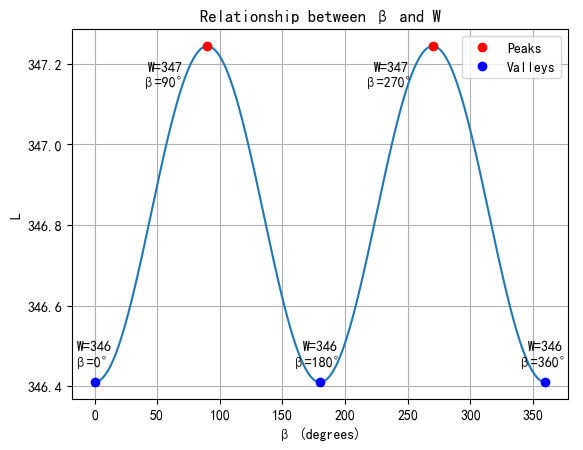

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

def calculate_L(b):
    sita = np.deg2rad(120)
    a = 1.5
    D = 100
    
    tan_a = np.tan(np.deg2rad(a))
    tan_r = tan_a * np.sin(np.deg2rad(b))
    r = np.arctan(tan_r)
    
    L = D * np.sin(sita/2) / np.cos(sita/2+r) + D * np.sin(sita/2) / np.cos(sita/2-r)
    return L

# 生成b的取值范围
b_values = np.linspace(0, 360, 361)

# 计算相应的L值
L_values = [calculate_L(b) for b in b_values]

# 找到所有极值点的索引
peaks = argrelextrema(np.array(L_values), np.greater)[0]
valleys = argrelextrema(np.array(L_values), np.less)[0]

# 找到所有极值点的值和对应的角度
peaks_L_values = np.array(L_values)[peaks]
peaks_b_values = np.array(b_values)[peaks]
valleys_L_values = np.array(L_values)[valleys]
valleys_b_values = np.array(b_values)[valleys]

# 最左侧和最右侧的两个极小值点
left_valley_L = L_values[0]
left_valley_b = 0
right_valley_L = L_values[-1]
right_valley_b = 360

# 绘制图像
plt.plot(b_values, L_values)
plt.xlabel('β (degrees)')
plt.ylabel('L')
plt.title('Relationship between β and W')
plt.grid(True)

# 标注极值点
plt.plot(peaks_b_values, peaks_L_values, 'ro', label='Peaks')
plt.plot(valleys_b_values, valleys_L_values, 'bo', label='Valleys')
plt.plot(left_valley_b, left_valley_L, 'bo')
plt.plot(right_valley_b, right_valley_L, 'bo')

# 添加注释和角度、横坐标标注
for i in range(len(peaks_L_values)):
    plt.annotate(f'W={int(peaks_L_values[i])}\nβ={int(peaks_b_values[i])}°', (peaks_b_values[i], peaks_L_values[i]), textcoords="offset points", xytext=(-30, -30), ha='center', va='bottom')
for i in range(len(valleys_L_values)):
    plt.annotate(f'W={int(valleys_L_values[i])}\nβ={int(valleys_b_values[i])}°', (valleys_b_values[i], valleys_L_values[i]), textcoords="offset points", xytext=(0, 30), ha='center', va='top')
plt.annotate(f'W={int(left_valley_L)}\nβ={int(left_valley_b)}°', (left_valley_b, left_valley_L), textcoords="offset points", xytext=(0, 30), ha='center', va='top')
plt.annotate(f'W={int(right_valley_L)}\nβ={int(right_valley_b)}°', (right_valley_b, right_valley_L), textcoords="offset points", xytext=(0, 30), ha='center', va='top')

plt.legend()
plt.show()


# 第三问

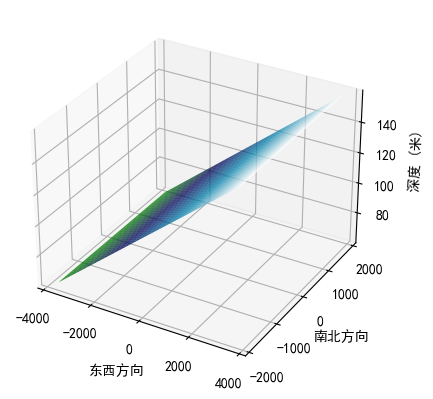

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 海域尺寸
length = 2 * 1852  # 南北长度，单位：米
width = 4 * 1852  # 东西宽度，单位：米

# 海底深度
depth = 110  # 单位：米

# 生成网格点坐标
x = np.linspace(-width/2, width/2, 100)
y = np.linspace(-length/2, length/2, 100)
X, Y = np.meshgrid(x, y)

# 计算海底高度
Z = depth + (X/width) * (np.tan(np.radians(1.5)) * length)

# 绘制三维图像
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='ocean')

# 设置坐标轴标签
ax.set_xlabel('东西方向')
ax.set_ylabel('南北方向')
ax.set_zlabel('深度 (米)')

plt.show()

In [124]:
import math

# 计算 w
def calculate_w(D, p, a):
    w1 = D * math.sin(math.radians(p/2)) / math.cos(math.radians(p/2 + a))
    w2 = D * math.sin(math.radians(p/2)) / math.cos(math.radians(p/2 - a))
    w = w1 + w2
    return w

# 计算 d
def calculate_d(n, w, a):
    d = (1 - n) * w * math.cos(math.radians(a))
    return d

a = 1.5  # 角度在代码中确定时的值
p = 120
L = 7408  # 总长度

# 初始值
D = (3704 * math.tan(math.radians(a)) + 100) * (1 - math.tan(math.radians(p/2)) * math.tan(math.radians(a)))
s = (3704 * math.tan(math.radians(a)) + 110) * math.tan(math.radians(p/2))
n = 0.1

while s <= L:
    w = calculate_w(D, p, a)
    d = calculate_d(n, w, a)
    print(f"D: {D}, w: {w}, d: {d}, s: {s}")

    D = D - d * math.tan(math.radians(a))
    s += d

print("Calculation finished!")


D: 188.05798341530632, w: 653.0186063801154, d: 587.5153498918913, s: 358.52179264210815
D: 172.67335254234385, w: 599.5965179907705, d: 539.451946115381, s: 946.0371425339995
D: 158.54730619102122, w: 550.5447790830417, d: 495.3205090236714, s: 1485.4890886493804
D: 145.5768821901176, w: 505.50586049310687, d: 454.7993726340058, s: 1980.8095976730517
D: 133.6675414886081, w: 464.1514817713539, d: 417.59318578589347, s: 2435.6089703070575
D: 122.73247907779178, w: 426.1802184061547, d: 383.4307593804558, s: 2853.202156092951
D: 112.69199128544138, w: 391.3153047956668, d: 352.06308973262804, s: 3236.6329154734067
D: 103.47289483029715, w: 359.30261695392244, d: 323.2615436287879, s: 3588.696005206035
D: 95.00799340249941, w: 329.9088202475199, d: 296.81619186102995, s: 3911.957548834823
D: 87.23558788196173, w: 302.9196686621077, d: 272.53427909152026, s: 4208.773740695853
D: 80.09902662475628, w: 278.1384432023258, d: 250.23881889405268, s: 4481.308019787373
D: 73.54629253963064, w: 2

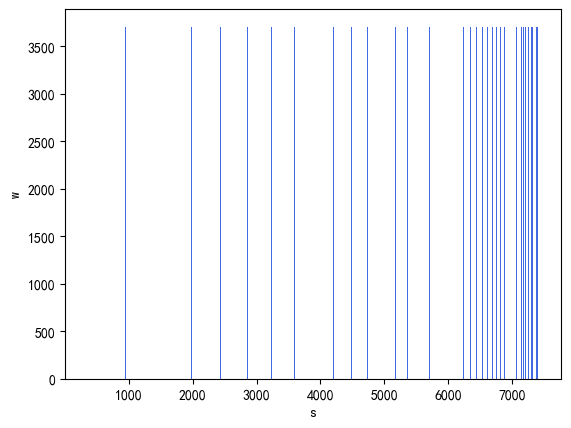

In [143]:
import matplotlib.pyplot as plt

# 数据
data = [
    [358.5217926, 3704],
    [946.0371425, 3704],
    [1485.489089, 3704],
    [1980.809598, 3704],
    [2435.60897, 3704],
    [2853.202156, 3704],
    [3236.632915, 3704],
    [3588.696005, 3704],
    [3911.957549, 3704],
    [4208.773741, 3704],
    [4481.30802, 3704],
    [4731.546839, 3704],
    [4961.314142, 3704],
    [5172.284663, 3704],
    [5365.996126, 3704],
    [5543.860458, 3704],
    [5707.174081, 3704],
    [5857.127358, 3704],
    [5994.81327, 3704],
    [6121.235385, 3704],
    [6237.315171, 3704],
    [6343.898712, 3704],
    [6441.762877, 3704],
    [6531.620978, 3704],
    [6614.127976, 3704],
    [6689.885248, 3704],
    [6759.444977, 3704],
    [6823.314169, 3704],
    [6881.958356, 3704],
    [6935.804985, 3704],
    [6985.246533, 3704],
    [7030.643371, 3704],
    [7072.326389, 3704],
    [7110.599407, 3704],
    [7145.741388, 3704],
    [7178.008478, 3704],
    [7207.635864, 3704],
    [7234.839496, 3704],
    [7259.817655, 3704],
    [7282.752404, 3704],
    [7303.810908, 3704],
    [7323.146661, 3704],
    [7340.900595, 3704],
    [7357.202118, 3704],
    [7372.170047, 3704],
    [7385.913481, 3704],
    [7398.532593, 3704],
    [7408, 3704]
]

# 提取数据
s_values = [d[0] for d in data]
widths = [d[1] for d in data]

# 设置每个柱状条的颜色
colors = ['yellow' if s == 7408 else 'royalblue' for s in s_values]  # 替换为不同的蓝色

# 绘制柱状图
plt.bar(s_values, widths, width=10, color=colors)

# 设置坐标轴标签
plt.xlabel('s')
plt.ylabel('w')

# 显示图形
plt.show()


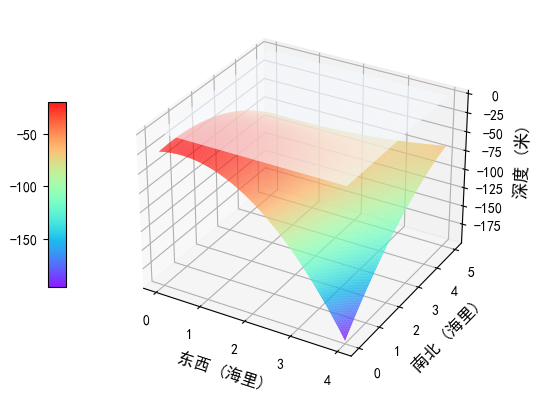

In [179]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

df = pd.read_excel("data1.xlsx",header = None)

fig = plt.figure()
ax = plt.axes(projection="3d")

x = np.arange(0,4.02,0.02)
y = np.arange(0,5.02,0.02)
X, Y = np.meshgrid(x, y)
Z = np.array(df.values)
Z = -Z
Z1 = np.zeros((251,201))
surf = ax.plot_surface(X,Y,Z,alpha=0.9, cstride=1, rstride = 1, cmap='rainbow') #Greys
ax.plot_surface(X,Y,Z1,alpha=0.9, cstride=1, rstride = 1, cmap='Blues')

ax.set_xlabel("东西 (海里)",fontsize=12)
ax.set_ylabel("南北 (海里)",fontsize=12)
ax.set_zlabel("深度 (米)",fontsize=12)           
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, location='left')
# plt.title("单波束测深海底三维建模")
plt.show()

d:\programming\python\python_3.7.2\lib\site-packages\ipykernel_launcher.py:82: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


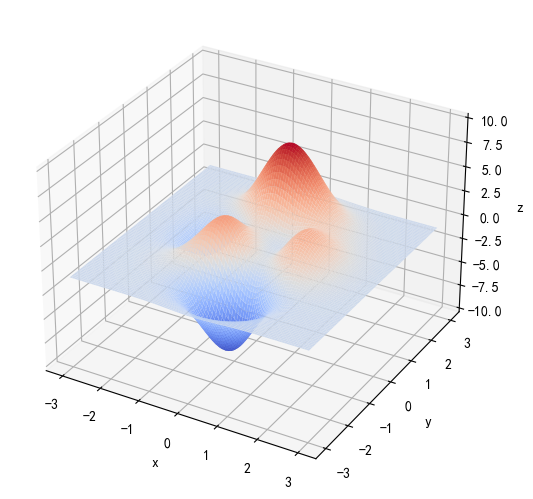

max_fitness: 0.11174971467274697
最优的基因型： [1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0
 0 1 1 1 1 0 1 0 0 0 0]
(x, y): (0.08524579317842651, 1.4959805307376701)


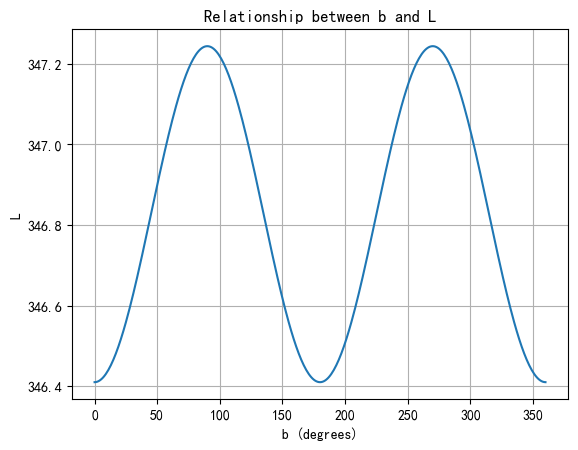

In [85]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_L(b):
    sita = np.deg2rad(120)
    a = 1.5
    D = 100
    
    tan_a = np.tan(np.deg2rad(a))
    tan_r = tan_a * np.sin(np.deg2rad(b))
    r = np.arctan(tan_r)
    
    L = D * np.sin(sita/2) / np.cos(sita/2+r) + D * np.sin(sita/2) / np.cos(sita/2-r)
    return L

# 生成b的取值范围
b_values = np.linspace(0, 360, 361)

# 计算相应的L值
L_values = [calculate_L(b) for b in b_values]

# 绘制图像
plt.plot(b_values, L_values)
plt.xlabel('b (degrees)')
plt.ylabel('L')
plt.title('Relationship between b and L')
plt.grid(True)
plt.show()

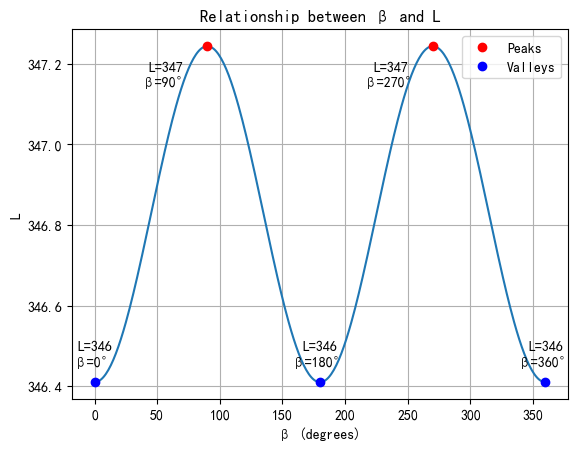

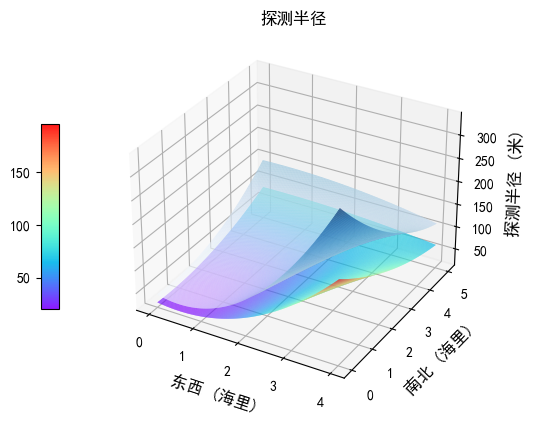

In [115]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

df = pd.read_excel("data1.xlsx",header = None)

fig = plt.figure()
ax = plt.axes(projection="3d")

x = np.arange(0,4.02,0.02)
y = np.arange(0,5.02,0.02)
X, Y = np.meshgrid(x, y)
Z = np.array(df.values)  # 假设已经将 DataFrame 转换为 NumPy 数组
angle = np.radians(60)   # 将角度转换为弧度

Z1 = Z * np.tan(angle)  # 用 Z 乘以 tan(60°)
surf = ax.plot_surface(X,Y,Z,alpha=0.9, cstride=1, rstride = 1, cmap='rainbow') #Greys
ax.plot_surface(X,Y,Z1,alpha=0.9, cstride=1, rstride = 1, cmap='Blues')

ax.set_xlabel("东西 (海里)",fontsize=12)
ax.set_ylabel("南北 (海里)",fontsize=12)
ax.set_zlabel("探测半径 (米)",fontsize=12)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, location='left')
plt.title("探测半径")
plt.show()


In [150]:
df=pd.read_excel("matrix.xlsx",header = None)
radius_matrix = np.array(df.values)

In [152]:
def initial_point(radius_matrix):
    max_index = np.unravel_index(np.argmax(radius_matrix), radius_matrix.shape)
    return max_index

In [156]:
print(initial_point(radius_matrix),radius_matrix[5, 195])

(5, 195) 78


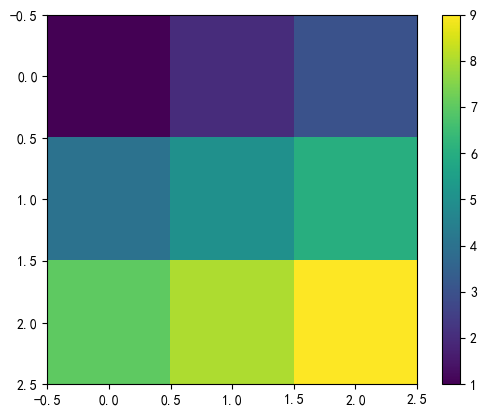

In [157]:
import matplotlib.pyplot as plt
import numpy as np

def plot_matrix(matrix):
    plt.imshow(matrix, cmap='viridis')  # 使用'viridis'颜色映射
    plt.colorbar()  # 添加颜色条
    plt.show()
    
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
plot_matrix(matrix)

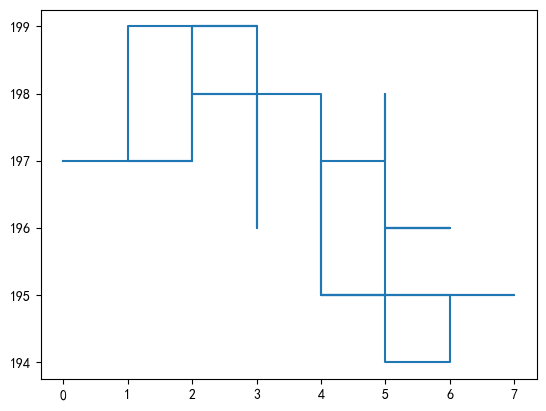

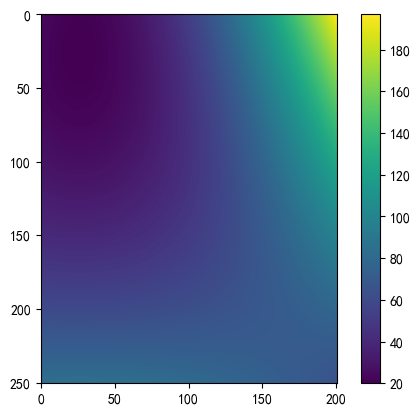

In [162]:
import matplotlib.pyplot as plt
import numpy as np


def plot_matrix(matrix):
    plt.imshow(matrix, cmap='viridis')  # 使用'viridis'颜色映射
    plt.colorbar()  # 添加颜色条
    plt.show()


lines = [[5, 195], [4, 195], [4, 196], [4, 195], [5, 195], [5, 194], [6, 194], [6, 195], [5, 195], [4, 195], [5, 195], [6, 195], [7, 195], [6, 195], [5, 195], [5, 196], [6, 196], [5, 196], [6, 196], [5, 196], [5, 197], [5, 198], [5, 197], [4, 197], [4, 196], [4, 197], [4, 198], [3, 198], [3, 197], [3, 196], [3, 197], [3, 198], [2, 198], [2, 199], [3, 199], [2, 199], [1, 199], [1, 198], [1, 197], [2, 197], [2, 198], [2, 199], [3, 199], [3, 198], [2, 198], [2, 197], [1, 197], [0, 197]]

# 转换为numpy数组
lines_arr = np.array(lines)

# 分别获取x和y坐标数组
x_coords = lines_arr[:, 0]
y_coords = lines_arr[:, 1]

# 绘制线条
plt.plot(x_coords, y_coords)

# 显示图像
plt.show()

data  = pd.read_excel("data1.xlsx",header = None)
data = np.array(data.values)
plot_matrix(data)

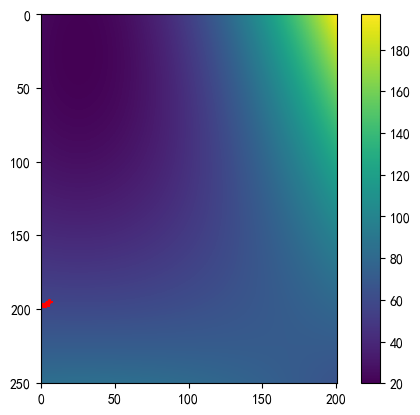

In [163]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

lines = [[5, 195], [4, 195], [4, 196], [4, 195], [5, 195], [5, 194], [6, 194], [6, 195], [5, 195], [4, 195], [5, 195], [6, 195], [7, 195], [6, 195], [5, 195], [5, 196], [6, 196], [5, 196], [6, 196], [5, 196], [5, 197], [5, 198], [5, 197], [4, 197], [4, 196], [4, 197], [4, 198], [3, 198], [3, 197], [3, 196], [3, 197], [3, 198], [2, 198], [2, 199], [3, 199], [2, 199], [1, 199], [1, 198], [1, 197], [2, 197], [2, 198], [2, 199], [3, 199], [3, 198], [2, 198], [2, 197], [1, 197], [0, 197]]

# 转换为numpy数组
lines_arr = np.array(lines)

# 分别获取x和y坐标数组
x_coords = lines_arr[:, 0]
y_coords = lines_arr[:, 1]

data = pd.read_excel("data1.xlsx", header=None)
matrix_data = np.array(data.values)

plt.imshow(matrix_data, cmap='viridis')  # 使用'viridis'颜色映射

# 绘制直线
plt.plot(x_coords, y_coords, color='red')

plt.colorbar()  # 添加颜色条
plt.show()

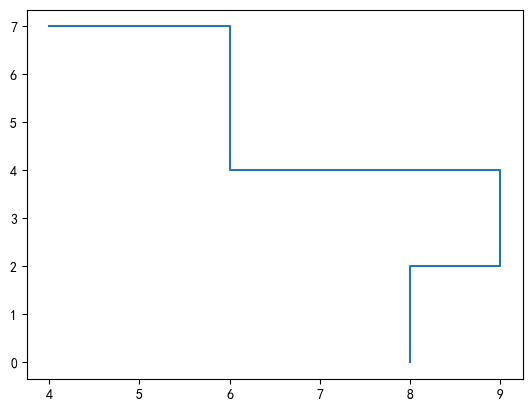

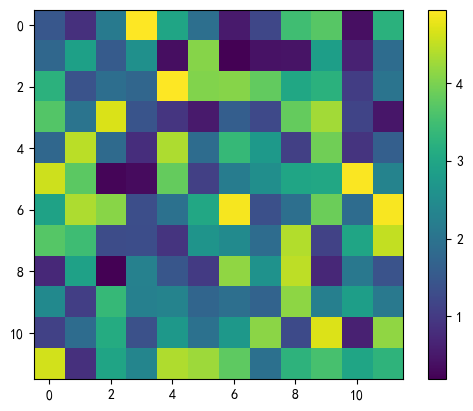

In [164]:
import matplotlib.pyplot as plt
import numpy as np


def plot_matrix(matrix):
    plt.imshow(matrix, cmap='viridis')  # 使用'viridis'颜色映射
    plt.colorbar()  # 添加颜色条
    plt.show()


lines = [[4, 7], [5, 7], [6, 7], [6, 6], [6, 5], [6, 4], [7, 4], [8, 4], [9, 4], [9, 3], [9, 2], [8, 2], [8, 1], [8, 0]]

# 转换为numpy数组
lines_arr = np.array(lines)

# 分别获取x和y坐标数组
x_coords = lines_arr[:, 0]
y_coords = lines_arr[:, 1]

# 绘制线条
plt.plot(x_coords, y_coords)

# 显示图像
plt.show()

data  = [[1.4886142, 0.8456213, 2.136997, 4.941508, 2.985246, 1.932116, 0.53975916, 1.1956012, 3.4974842, 3.7163546, 0.37741286, 3.2192883],
 [1.7710884, 2.8999279, 1.5591438, 2.5739675, 0.36148265, 4.0796123, 0.19468784, 0.41717866, 0.44161805, 2.858394, 0.64020824, 1.8696929],
 [3.2411544, 1.4165895, 1.9165912, 1.760249, 4.946924, 4.0427003, 4.0804954, 3.8089445, 3.0171409, 3.2375948, 1.051466, 2.028216],
 [3.668133, 2.023943, 4.670376, 1.4255198, 0.9299506, 0.5426398, 1.6190097, 1.2455684, 3.825147, 4.2921057, 1.1633718, 0.47321957],
 [1.7753079, 4.4532833, 1.8346862, 0.8180791, 4.368987, 1.8748162, 3.3748724, 2.7547379, 1.084064, 3.923028, 0.912049, 1.633536],
 [4.5770545, 3.7520282, 0.26316088, 0.32538202, 3.827253, 1.0943422, 2.193553, 2.539213, 2.9938908, 3.051608, 4.9113183, 2.3171308],
 [2.9307108, 4.358497, 4.0927663, 1.3401148, 1.9592247, 3.0486445, 4.8886576, 1.3506546, 1.934777, 3.8792076, 1.8799514, 4.907252],
 [3.688964, 3.4612098, 1.2939997, 1.3174696, 0.9073608, 2.6526885, 2.472786, 1.8772297, 4.4024687, 1.1228155, 2.9902546, 4.505084],
 [0.7336474, 2.9115882, 0.19073708, 2.27222, 1.4719074, 0.9961275, 4.165045, 2.6126196, 4.474238, 0.71501017, 2.0895965, 1.4055438],
 [2.447018, 1.0646493, 3.3767536, 2.263373, 2.313686, 1.7354474, 1.9270022, 1.7004374, 4.133756, 2.2387974, 2.8513665, 2.1114748],
 [1.1160762, 1.8740808, 3.1195884, 1.3742502, 2.7280214, 1.960381, 2.7193341, 4.1256075, 1.2675519, 4.688991, 0.63170415, 4.1508236],
 [4.630166, 0.84973407, 2.9772265, 2.353126, 4.3826966, 4.2475386, 3.7644026, 1.9522374, 3.261402, 3.5550673, 2.9840074, 3.2882686]]
data = np.array(data)
plot_matrix(data)

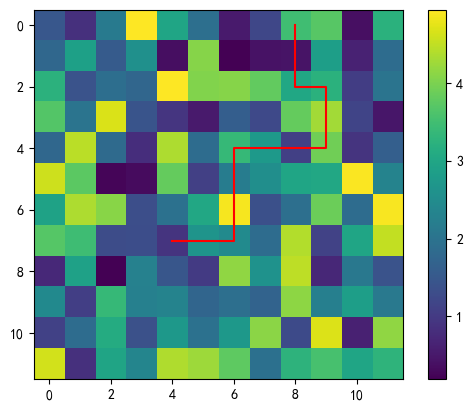

In [165]:

import numpy as np
import pandas as pd

lines = [[4, 7], [5, 7], [6, 7], [6, 6], [6, 5], [6, 4], [7, 4], [8, 4], [9, 4], [9, 3], [9, 2], [8, 2], [8, 1], [8, 0]]

# 转换为numpy数组
lines_arr = np.array(lines)

# 分别获取x和y坐标数组
x_coords = lines_arr[:, 0]
y_coords = lines_arr[:, 1]

data =  [[1.4886142, 0.8456213, 2.136997, 4.941508, 2.985246, 1.932116, 0.53975916, 1.1956012, 3.4974842, 3.7163546, 0.37741286, 3.2192883],
 [1.7710884, 2.8999279, 1.5591438, 2.5739675, 0.36148265, 4.0796123, 0.19468784, 0.41717866, 0.44161805, 2.858394, 0.64020824, 1.8696929],
 [3.2411544, 1.4165895, 1.9165912, 1.760249, 4.946924, 4.0427003, 4.0804954, 3.8089445, 3.0171409, 3.2375948, 1.051466, 2.028216],
 [3.668133, 2.023943, 4.670376, 1.4255198, 0.9299506, 0.5426398, 1.6190097, 1.2455684, 3.825147, 4.2921057, 1.1633718, 0.47321957],
 [1.7753079, 4.4532833, 1.8346862, 0.8180791, 4.368987, 1.8748162, 3.3748724, 2.7547379, 1.084064, 3.923028, 0.912049, 1.633536],
 [4.5770545, 3.7520282, 0.26316088, 0.32538202, 3.827253, 1.0943422, 2.193553, 2.539213, 2.9938908, 3.051608, 4.9113183, 2.3171308],
 [2.9307108, 4.358497, 4.0927663, 1.3401148, 1.9592247, 3.0486445, 4.8886576, 1.3506546, 1.934777, 3.8792076, 1.8799514, 4.907252],
 [3.688964, 3.4612098, 1.2939997, 1.3174696, 0.9073608, 2.6526885, 2.472786, 1.8772297, 4.4024687, 1.1228155, 2.9902546, 4.505084],
 [0.7336474, 2.9115882, 0.19073708, 2.27222, 1.4719074, 0.9961275, 4.165045, 2.6126196, 4.474238, 0.71501017, 2.0895965, 1.4055438],
 [2.447018, 1.0646493, 3.3767536, 2.263373, 2.313686, 1.7354474, 1.9270022, 1.7004374, 4.133756, 2.2387974, 2.8513665, 2.1114748],
 [1.1160762, 1.8740808, 3.1195884, 1.3742502, 2.7280214, 1.960381, 2.7193341, 4.1256075, 1.2675519, 4.688991, 0.63170415, 4.1508236],
 [4.630166, 0.84973407, 2.9772265, 2.353126, 4.3826966, 4.2475386, 3.7644026, 1.9522374, 3.261402, 3.5550673, 2.9840074, 3.2882686]]
data = np.array(data)
matrix_data = np.array(data)

plt.imshow(matrix_data, cmap='viridis')  # 使用'viridis'颜色映射

# 绘制直线
plt.plot(x_coords, y_coords, color='red')

plt.colorbar()  # 添加颜色条
plt.show()

In [166]:
line = [[5, 195], [5, 194], [6, 194], [7, 194], [8, 194], [9, 194], [10, 194], [11, 194], [12, 194], [13, 194], [14, 194], [15, 194], [16, 194], [17, 194], [18, 194], [19, 194], [20, 194], [21, 194], [22, 194], [23, 194], [24, 194], [25, 194], [26, 194], [27, 194], [28, 194], [29, 194], [30, 194], [31, 194], [32, 194], [33, 194], [34, 194], [35, 194], [36, 194], [37, 194], [38, 194], [39, 194], [40, 194], [41, 194], [42, 194], [43, 194], [44, 194], [45, 194], [46, 194], [47, 194], [48, 194], [49, 194], [50, 194], [51, 194], [52, 194], [53, 194], [54, 194], [55, 194], [56, 194], [57, 194], [58, 194], [59, 194], [60, 194], [61, 194], [62, 194], [63, 194], [64, 194], [65, 194], [66, 194], [67, 194], [68, 194], [69, 194], [70, 194], [71, 194], [72, 194], [73, 194], [74, 194], [75, 194], [76, 194], [77, 194], [78, 194], [79, 194], [80, 194], [81, 194], [82, 194], [83, 194], [84, 194], [85, 194], [86, 194], [87, 194], [88, 194], [89, 194], [90, 194], [91, 194], [92, 194], [93, 194], [94, 194], [95, 194], [96, 194], [97, 194], [98, 194], [99, 194], [100, 194], [101, 194], [102, 194], [103, 194], [104, 194], [105, 194], [106, 194], [107, 194], [108, 194], [109, 194], [110, 194], [111, 194], [112, 194], [113, 194], [114, 194], [114, 195], [115, 195], [116, 195], [117, 195], [118, 195], [119, 195], [120, 195], [121, 195], [122, 195], [123, 195], [124, 195], [125, 195], [126, 195], [127, 195], [128, 195], [129, 195], [130, 195], [131, 195], [132, 195], [133, 195], [134, 195], [135, 195], [136, 195], [137, 195], [138, 195], [139, 195], [140, 195], [141, 195], [142, 195], [143, 195], [144, 195], [145, 195], [146, 195], [147, 195], [148, 195], [149, 195], [150, 195], [151, 195], [152, 195], [153, 195], [154, 195], [155, 195], [156, 195], [157, 195], [158, 195], [159, 195], [160, 195], [161, 195], [162, 195], [163, 195], [164, 195], [165, 195], [166, 195], [167, 195], [168, 195], [169, 195], [170, 195], [171, 195], [172, 195], [173, 195], [174, 195], [175, 195], [176, 195], [177, 195], [178, 195], [179, 195], [180, 195], [181, 195], [182, 195], [183, 195], [184, 195], [185, 195], [186, 195], [187, 195], [188, 195], [189, 195], [190, 195], [191, 195], [192, 195], [193, 195], [194, 195], [195, 195], [196, 195], [197, 195], [198, 195], [198, 196], [198, 197], [199, 197], [200, 197], [201, 197], [202, 197], [203, 197], [204, 197], [205, 197], [206, 197], [207, 197], [208, 197], [209, 197], [210, 197], [211, 197], [212, 197], [213, 197], [214, 197], [215, 197], [216, 197], [217, 197], [218, 197], [219, 197], [220, 197], [221, 197], [222, 197], [223, 197], [224, 197], [225, 197], [226, 197], [227, 197], [228, 197], [229, 197], [230, 197], [231, 197], [232, 197], [233, 197], [234, 197], [235, 197], [236, 197], [237, 197], [238, 197], [239, 197], [240, 197], [241, 197], [242, 197], [243, 197], [244, 197], [245, 197], [246, 197], [247, 197], [248, 197], [249, 197], [249, 196], [249, 195], [249, 194], [249, 193], [249, 192], [249, 191], [249, 190], [249, 189], [249, 188], [249, 187], [249, 186], [249, 185], [249, 184], [249, 183], [249, 182], [249, 181], [249, 180], [249, 179], [249, 178], [249, 177], [249, 176], [249, 175], [249, 174], [249, 173], [249, 172], [249, 171], [249, 170], [249, 169], [249, 168], [249, 167], [249, 166], [249, 165], [249, 164], [249, 163], [249, 162], [249, 161], [249, 160], [249, 159], [249, 158], [249, 157], [249, 156], [249, 155], [249, 154], [249, 153], [249, 152], [249, 151], [249, 150], [249, 149], [249, 148], [249, 147], [249, 146], [249, 145], [249, 144], [249, 143], [249, 142], [249, 141], [249, 140], [249, 139], [249, 138], [249, 137], [249, 136], [249, 135], [249, 134], [249, 133], [249, 132], [249, 131], [249, 130], [249, 129], [249, 128], [249, 127], [249, 126], [249, 125], [249, 124], [249, 123], [249, 122], [249, 121], [249, 120], [249, 119], [249, 118], [249, 117], [249, 116], [249, 115], [248, 115], [248, 114], [248, 113], [248, 112], [248, 111], [248, 110], [248, 109], [248, 108], [248, 107], [248, 106], [248, 105], [248, 104], [248, 103], [248, 102], [248, 101], [248, 100], [248, 99], [248, 98], [248, 97], [248, 96], [248, 95], [248, 94], [248, 93], [248, 92], [248, 91], [248, 90], [248, 89], [248, 88], [248, 87], [248, 86], [248, 85], [248, 84], [248, 83], [248, 82], [248, 81], [248, 80], [248, 79], [248, 78], [248, 77], [248, 76], [248, 75], [248, 74], [248, 73], [248, 72], [248, 71], [248, 70], [248, 69], [248, 68], [248, 67], [248, 66], [248, 65], [248, 64], [248, 63], [248, 62], [248, 61], [248, 60], [248, 59], [248, 58], [248, 57], [248, 56], [248, 55], [248, 54], [248, 53], [248, 52], [248, 51], [248, 50], [248, 49], [248, 48], [248, 47], [248, 46], [248, 45], [248, 44], [248, 43], [248, 42], [248, 41], [248, 40], [248, 39], [248, 38], [248, 37], [248, 36], [248, 35], [248, 34], [248, 33], [248, 32], [248, 31], [248, 30], [248, 29], [248, 28], [248, 27], [248, 26], [248, 25], [248, 24], [248, 23], [248, 22], [248, 21], [248, 20], [248, 19], [248, 18], [248, 17], [248, 16], [248, 15], [248, 14], [248, 13], [248, 12], [248, 11], [248, 10], [248, 9], [248, 8], [248, 7], [248, 6], [248, 5], [248, 4], [248, 3], [247, 3], [246, 3], [245, 3], [244, 3], [243, 3], [242, 3], [241, 3], [241, 4], [241, 5], [241, 6], [241, 7], [241, 8], [241, 9], [241, 10], [241, 11], [241, 12], [241, 13], [241, 14], [241, 15], [241, 16], [241, 17], [241, 18], [241, 19], [241, 20], [241, 21], [241, 22], [241, 23], [241, 24], [241, 25], [241, 26], [241, 27], [241, 28], [241, 29], [241, 30], [241, 31], [241, 32], [241, 33], [241, 34], [241, 35], [241, 36], [241, 37], [241, 38], [241, 39], [241, 40], [241, 41], [241, 42], [241, 43], [241, 44], [241, 45], [241, 46], [241, 47], [241, 48], [241, 49], [241, 50], [241, 51], [241, 52], [241, 53], [241, 54], [241, 55], [241, 56], [241, 57], [241, 58], [241, 59], [241, 60], [241, 61], [241, 62], [241, 63], [241, 64], [241, 65], [241, 66], [241, 67], [241, 68], [241, 69], [241, 70], [241, 71], [241, 72], [241, 73], [241, 74], [241, 75], [241, 76], [241, 77], [241, 78], [241, 79], [241, 80], [241, 81], [241, 82], [241, 83], [241, 84], [241, 85], [241, 86], [241, 87], [241, 88], [241, 89], [241, 90], [241, 91], [241, 92], [241, 93], [241, 94], [241, 95], [241, 96], [241, 97], [241, 98], [241, 99], [241, 100], [241, 101], [241, 102], [241, 103], [241, 104], [241, 105], [241, 106], [241, 107], [241, 108], [241, 109], [241, 110], [241, 111], [241, 112], [241, 113], [241, 114], [241, 115], [241, 116], [241, 117], [241, 118], [241, 119], [241, 120], [241, 121], [241, 122], [241, 123], [241, 124], [241, 125], [241, 126], [241, 127], [241, 128], [241, 129], [241, 130], [241, 131], [241, 132], [241, 133], [241, 134], [241, 135], [241, 136], [241, 137], [241, 138], [241, 139], [241, 140], [241, 141], [241, 142], [241, 143], [241, 144], [241, 145], [241, 146], [241, 147], [241, 148], [241, 149], [241, 150], [241, 151], [241, 152], [241, 153], [241, 154], [241, 155], [241, 156], [241, 157], [241, 158], [241, 159], [241, 160], [241, 161], [241, 162], [241, 163], [241, 164], [241, 165], [241, 166], [241, 167], [241, 168], [241, 169], [241, 170], [241, 171], [241, 172], [241, 173], [241, 174], [241, 175], [241, 176], [241, 177], [241, 178], [241, 179], [241, 180], [241, 181], [241, 182], [241, 183], [241, 184], [241, 185], [241, 186], [241, 187], [241, 188], [241, 189], [241, 190], [240, 190], [239, 190], [238, 190], [237, 190], [236, 190], [235, 190], [234, 190], [233, 190], [232, 190], [231, 190], [230, 190], [229, 190], [228, 190], [227, 190], [226, 190], [225, 190], [224, 190], [223, 190], [222, 190], [221, 190], [220, 190], [219, 190], [218, 190], [217, 190], [216, 190], [215, 190], [214, 190], [213, 190], [212, 190], [211, 190], [210, 190], [209, 190], [208, 190], [207, 190], [206, 190], [205, 190], [204, 190], [203, 190], [202, 190], [201, 190], [200, 190], [199, 190], [198, 190], [197, 190], [197, 189], [196, 189], [195, 189], [194, 189], [193, 189], [192, 189], [191, 189], [190, 189], [189, 189], [189, 188], [189, 187], [189, 186], [188, 186], [187, 186], [186, 186], [185, 186], [184, 186], [183, 186], [182, 186], [181, 186], [180, 186], [179, 186], [178, 186], [177, 186], [176, 186], [175, 186], [174, 186], [173, 186], [172, 186], [171, 186], [170, 186], [169, 186], [168, 186], [167, 186], [166, 186], [165, 186], [164, 186], [163, 186], [162, 186], [161, 186], [160, 186], [159, 186], [158, 186], [157, 186], [156, 186], [155, 186], [154, 186], [153, 186], [152, 186], [151, 186], [150, 186], [149, 186], [148, 186], [147, 186], [146, 186], [145, 186], [144, 186], [143, 186], [142, 186], [141, 186], [140, 186], [139, 186], [138, 186], [137, 186], [136, 186], [135, 186], [134, 186], [133, 186], [132, 186], [131, 186], [130, 186], [129, 186], [128, 186], [127, 186], [126, 186], [125, 186], [124, 186], [123, 186], [122, 186], [121, 186], [120, 186], [119, 186], [118, 186], [117, 186], [117, 185], [116, 185], [115, 185], [114, 185], [113, 185], [112, 185], [111, 185], [110, 185], [109, 185], [108, 185], [107, 185], [107, 184], [107, 183], [107, 182], [107, 181], [107, 180], [107, 179], [107, 178], [107, 177], [107, 176], [107, 175], [107, 174], [107, 173], [107, 172], [107, 171], [107, 170], [107, 169], [107, 168], [107, 167], [107, 166], [107, 165], [107, 164], [107, 163], [107, 162], [107, 161], [107, 160], [107, 159], [107, 158], [107, 157], [107, 156], [107, 155], [106, 155], [105, 155], [104, 155], [103, 155], [102, 155], [101, 155], [100, 155], [100, 156], [100, 157], [100, 158], [100, 159], [100, 160], [100, 161], [100, 162], [100, 163], [100, 164], [100, 165], [100, 166], [100, 167], [100, 168], [100, 169], [100, 170], [100, 171], [100, 172], [100, 173], [99, 173], [98, 173], [97, 173], [96, 173], [95, 173], [94, 173], [93, 173], [92, 173], [92, 174], [91, 174], [90, 174], [89, 174], [88, 174], [87, 174], [86, 174], [85, 174], [84, 174], [83, 174], [82, 174], [81, 174], [80, 174], [79, 174], [78, 174], [77, 174], [76, 174], [75, 174], [74, 174], [73, 174], [72, 174], [71, 174], [70, 174], [69, 174], [68, 174], [67, 174], [66, 174], [65, 174], [64, 174], [63, 174], [62, 174], [61, 174], [60, 174], [59, 174], [58, 174], [57, 174], [56, 174], [55, 174], [54, 174], [53, 174], [52, 174], [51, 174], [50, 174], [49, 174], [48, 174], [47, 174], [46, 174], [45, 174], [44, 174], [43, 174], [42, 174], [41, 174], [40, 174], [39, 174], [38, 174], [37, 174], [36, 174], [35, 174], [34, 174], [33, 174], [32, 174], [31, 174], [30, 174], [29, 174], [28, 174], [27, 174], [26, 174], [25, 174], [24, 174], [23, 174], [22, 174], [21, 174], [20, 174], [19, 174], [18, 174], [17, 174], [16, 174], [15, 174], [14, 174], [13, 174], [12, 174], [11, 174], [10, 174], [9, 174], [8, 174], [7, 174], [7, 175], [7, 176], [7, 177], [7, 178], [7, 179], [7, 180], [8, 180], [9, 180], [10, 180], [11, 180], [12, 180], [13, 180], [14, 180], [15, 180], [16, 180], [17, 180], [18, 180], [19, 180], [20, 180], [21, 180], [22, 180], [23, 180], [24, 180], [25, 180], [26, 180], [27, 180], [28, 180], [29, 180], [30, 180], [31, 180], [32, 180], [33, 180], [33, 181], [34, 181], [35, 181], [36, 181], [37, 181], [38, 181], [39, 181], [40, 181], [41, 181], [42, 181], [43, 181], [44, 181], [45, 181], [46, 181], [47, 181], [48, 181], [49, 181], [50, 181], [51, 181], [52, 181], [53, 181], [54, 181], [55, 181], [56, 181], [57, 181], [58, 181], [59, 181], [60, 181], [61, 181], [62, 181], [63, 181], [64, 181], [65, 181], [66, 181], [67, 181], [68, 181], [69, 181], [69, 182], [70, 182], [71, 182], [71, 183], [72, 183], [73, 183], [74, 183], [75, 183], [76, 183], [77, 183], [78, 183], [79, 183], [80, 183], [81, 183], [82, 183], [83, 183], [84, 183], [85, 183], [86, 183], [87, 183], [88, 183], [89, 183], [90, 183], [91, 183], [92, 183], [93, 183], [94, 183], [95, 183], [96, 183], [97, 183], [98, 183], [98, 182], [98, 181], [99, 181], [99, 182], [99, 183], [99, 184], [99, 183], [99, 182], [100, 182], [100, 181], [99, 181], [98, 181], [98, 182], [99, 182], [99, 183], [98, 183], [98, 184], [99, 184], [99, 185], [98, 185], [99, 185], [99, 184], [100, 184], [99, 184], [98, 184], [98, 183], [98, 184], [98, 183], [97, 183], [97, 182], [97, 181], [97, 182], [96, 182], [95, 182], [95, 183], [95, 184], [95, 185], [95, 184], [95, 185], [96, 185], [96, 184], [96, 183], [97, 183], [97, 182], [97, 181], [98, 181], [99, 181], [99, 182], [99, 181], [99, 180], [99, 181], [100, 181], [100, 182], [100, 181], [99, 181], [100, 181], [100, 182], [100, 181], [99, 181], [99, 180], [100, 180], [100, 181], [100, 182], [100, 181], [99, 181], [99, 180], [100, 180], [99, 180], [100, 180], [101, 180], [101, 179], [101, 180], [100, 180], [100, 181], [101, 181], [101, 180], [101, 179], [101, 178], [102, 178], [103, 178], [103, 177], [103, 176], [104, 176], [103, 176], [102, 176], [101, 176], [101, 175], [101, 174], [100, 174], [100, 173], [99, 173], [100, 173], [100, 174], [100, 173], [101, 173], [102, 173], [101, 173], [100, 173], [101, 173], [102, 173], [102, 174], [102, 173], [102, 174], [102, 175], [102, 174], [103, 174], [104, 174], [103, 174], [103, 173], [103, 172], [102, 172], [101, 172], [101, 171], [101, 170], [101, 169], [101, 170], [101, 169], [100, 169], [99, 169], [98, 169], [97, 169], [96, 169], [96, 168], [95, 168], [94, 168], [94, 167], [93, 167], [92, 167], [91, 167], [90, 167], [89, 167], [88, 167], [87, 167], [86, 167], [85, 167], [84, 167], [83, 167], [82, 167], [81, 167], [80, 167], [79, 167], [78, 167], [77, 167], [76, 167], [75, 167], [74, 167], [73, 167], [72, 167], [72, 166], [72, 165], [71, 165], [70, 165], [69, 165], [68, 165], [67, 165], [66, 165], [65, 165], [64, 165], [63, 165], [62, 165], [61, 165], [60, 165], [59, 165], [58, 165], [57, 165], [57, 164], [57, 163], [57, 162], [57, 161], [57, 160], [57, 159], [57, 158], [57, 157], [57, 156], [57, 155], [57, 154], [56, 154], [55, 154], [54, 154], [53, 154], [52, 154], [51, 154], [50, 154], [49, 154], [48, 154], [47, 154], [46, 154], [45, 154], [44, 154], [43, 154], [42, 154], [41, 154], [40, 154], [39, 154], [38, 154], [37, 154], [36, 154], [35, 154], [34, 154], [33, 154], [32, 154], [31, 154], [30, 154], [29, 154], [28, 154], [27, 154], [26, 154], [25, 154], [24, 154], [23, 154], [22, 154], [21, 154], [20, 154], [19, 154], [18, 154], [17, 154], [16, 154], [15, 154], [14, 154], [13, 154], [12, 154], [11, 154], [10, 154], [9, 154], [8, 154], [7, 154], [6, 154], [6, 155], [6, 156], [6, 157], [6, 158], [6, 159], [6, 160], [6, 161], [6, 162], [7, 162], [8, 162], [9, 162], [10, 162], [11, 162], [12, 162], [13, 162], [14, 162], [15, 162], [16, 162], [17, 162], [18, 162], [19, 162], [20, 162], [21, 162], [21, 163], [22, 163], [23, 163], [24, 163], [25, 163], [26, 163], [27, 163], [28, 163], [29, 163], [30, 163], [31, 163], [32, 163], [33, 163], [34, 163], [35, 163], [36, 163], [37, 163], [38, 163], [39, 163], [40, 163], [41, 163], [42, 163], [43, 163], [44, 163], [45, 163], [46, 163], [47, 163], [48, 163], [49, 163], [49, 164], [50, 164], [50, 163], [50, 162], [50, 163], [49, 163], [49, 164], [48, 164], [48, 165], [47, 165], [48, 165], [48, 164], [49, 164], [49, 165], [48, 165], [48, 164], [48, 163], [49, 163], [48, 163], [47, 163], [48, 163], [49, 163], [48, 163], [47, 163], [48, 163], [47, 163], [47, 162], [46, 162], [47, 162], [47, 163], [47, 162], [47, 161], [47, 162], [46, 162], [45, 162], [45, 163], [44, 163], [43, 163], [42, 163], [42, 162], [43, 162], [42, 162], [43, 162], [42, 162], [43, 162], [44, 162], [43, 162], [43, 161], [44, 161], [43, 161], [43, 162], [44, 162], [43, 162], [42, 162], [42, 163], [41, 163], [42, 163], [43, 163], [43, 162], [43, 161], [42, 161], [41, 161], [41, 162], [40, 162], [40, 161], [41, 161], [40, 161], [40, 160], [39, 160], [38, 160], [38, 159], [38, 160], [39, 160], [39, 161], [39, 160], [38, 160], [38, 159], [39, 159], [39, 160], [40, 160], [41, 160], [41, 159], [41, 160], [41, 159], [42, 159], [43, 159], [44, 159], [43, 159], [43, 160], [42, 160], [43, 160], [42, 160], [43, 160], [42, 160], [42, 161], [43, 161], [43, 162], [42, 162], [42, 163], [43, 163], [42, 163], [42, 162], [41, 162], [42, 162], [43, 162], [43, 163], [42, 163], [41, 163], [41, 164], [42, 164], [42, 165], [42, 166], [41, 166], [40, 166], [40, 165], [41, 165], [42, 165], [42, 164], [42, 165], [42, 166], [42, 167], [42, 168], [42, 167], [41, 167], [41, 166], [41, 167], [40, 167], [40, 168], [39, 168], [39, 167], [40, 167], [41, 167], [41, 166], [41, 167], [41, 168], [42, 168], [42, 169], [42, 170], [43, 170], [42, 170], [41, 170], [40, 170], [40, 169], [40, 168], [40, 169], [41, 169], [42, 169], [42, 170], [41, 170], [41, 169], [41, 168], [42, 168], [41, 168], [42, 168], [43, 168], [42, 168], [42, 169], [41, 169], [42, 169], [42, 170], [42, 169], [42, 168], [42, 167], [43, 167], [42, 167], [42, 168], [43, 168], [43, 167], [42, 167], [43, 167], [42, 167], [42, 166], [41, 166], [42, 166], [41, 166], [42, 166], [42, 165], [42, 164], [42, 163], [42, 164], [41, 164], [40, 164], [40, 165], [40, 164], [40, 165], [41, 165], [42, 165], [43, 165], [43, 164], [43, 165], [44, 165], [44, 164], [45, 164], [45, 165], [45, 164], [45, 163], [46, 163], [47, 163], [47, 162], [47, 163], [48, 163], [47, 163], [46, 163], [46, 164], [46, 163], [47, 163], [48, 163], [49, 163], [48, 163], [49, 163], [48, 163], [48, 162], [49, 162], [48, 162], [47, 162], [47, 161], [48, 161], [48, 162], [47, 162], [47, 161], [48, 161], [48, 162], [48, 161], [49, 161], [49, 162], [48, 162], [48, 163], [48, 164], [47, 164], [47, 163], [46, 163], [45, 163], [46, 163], [45, 163], [44, 163], [45, 163], [44, 163], [44, 164], [44, 163], [43, 163], [44, 163], [44, 162], [44, 161], [43, 161], [44, 161], [44, 160], [44, 161], [44, 160], [44, 159], [44, 158], [45, 158], [46, 158], [45, 158], [45, 159], [44, 159], [43, 159], [44, 159], [45, 159], [45, 158], [46, 158], [47, 158], [48, 158], [48, 159], [48, 160], [48, 159], [48, 158], [49, 158], [49, 159], [49, 158], [48, 158], [48, 157], [47, 157], [48, 157], [48, 158], [48, 159], [47, 159], [47, 160], [46, 160], [47, 160], [47, 161], [47, 160], [48, 160], [48, 161], [49, 161], [49, 160], [50, 160], [51, 160], [52, 160], [52, 161], [52, 160], [52, 161], [52, 160], [52, 161], [53, 161], [52, 161], [52, 162], [53, 162], [53, 161], [54, 161], [54, 160], [54, 161], [54, 160], [54, 161], [54, 160], [54, 161], [53, 161], [54, 161], [55, 161], [56, 161], [55, 161], [56, 161], [55, 161], [55, 160], [56, 160], [57, 160], [58, 160], [59, 160], [60, 160], [61, 160], [62, 160], [62, 159], [63, 159], [63, 158], [64, 158], [64, 157], [64, 156], [65, 156], [66, 156], [67, 156], [68, 156], [69, 156], [70, 156], [71, 156], [72, 156], [73, 156], [74, 156], [75, 156], [76, 156], [77, 156], [77, 155], [77, 154], [77, 153], [77, 152], [77, 151], [77, 150], [77, 149], [77, 148], [78, 148], [79, 148], [80, 148], [81, 148], [82, 148], [83, 148], [84, 148], [85, 148], [86, 148], [87, 148], [88, 148], [89, 148], [90, 148], [91, 148], [92, 148], [93, 148], [94, 148], [95, 148], [96, 148], [97, 148], [98, 148], [99, 148], [100, 148], [101, 148], [102, 148], [103, 148], [104, 148], [105, 148], [106, 148], [107, 148], [108, 148], [109, 148], [110, 148], [111, 148], [112, 148], [113, 148], [114, 148], [115, 148], [116, 148], [117, 148], [118, 148], [119, 148], [120, 148], [121, 148], [122, 148], [123, 148], [124, 148], [125, 148], [126, 148], [127, 148], [128, 148], [129, 148], [130, 148], [131, 148], [132, 148], [133, 148], [134, 148], [135, 148], [136, 148], [137, 148], [138, 148], [139, 148], [140, 148], [141, 148], [142, 148], [143, 148], [144, 148], [145, 148], [146, 148], [147, 148], [148, 148], [149, 148], [150, 148], [151, 148], [152, 148], [153, 148], [154, 148], [155, 148], [156, 148], [157, 148], [158, 148], [159, 148], [160, 148], [161, 148], [162, 148], [163, 148], [164, 148], [165, 148], [166, 148], [167, 148], [168, 148], [169, 148], [170, 148], [171, 148], [172, 148], [173, 148], [174, 148], [175, 148], [176, 148], [177, 148], [178, 148], [179, 148], [180, 148], [181, 148], [182, 148], [183, 148], [184, 148], [185, 148], [186, 148], [187, 148], [188, 148], [189, 148], [190, 148], [191, 148], [192, 148], [193, 148], [194, 148], [195, 148], [196, 148], [197, 148], [198, 148], [199, 148], [200, 148], [201, 148], [202, 148], [203, 148], [204, 148], [205, 148], [206, 148], [207, 148], [208, 148], [209, 148], [210, 148], [211, 148], [212, 148], [213, 148], [214, 148], [215, 148], [216, 148], [217, 148], [218, 148], [219, 148], [220, 148], [221, 148], [222, 148], [223, 148], [224, 148], [225, 148], [226, 148], [227, 148], [228, 148], [229, 148], [230, 148], [231, 148], [232, 148], [233, 148], [234, 148], [234, 147], [234, 146], [234, 145], [234, 144], [234, 143], [234, 142], [234, 141], [234, 140], [234, 139], [234, 138], [234, 137], [234, 136], [234, 135], [234, 134], [234, 133], [234, 132], [234, 131], [234, 130], [234, 129], [234, 128], [234, 127], [234, 126], [234, 125], [234, 124], [234, 123], [234, 122], [234, 121], [234, 120], [234, 119], [234, 118], [234, 117], [234, 116], [234, 115], [234, 114], [234, 113], [234, 112], [234, 111], [234, 110], [234, 109], [234, 108], [234, 107], [234, 106], [234, 105], [234, 104], [234, 103], [234, 102], [234, 101], [234, 100], [234, 99], [234, 98], [234, 97], [234, 96], [234, 95], [234, 94], [234, 93], [234, 92], [234, 91], [234, 90], [234, 89], [234, 88], [234, 87], [234, 86], [234, 85], [234, 84], [234, 83], [234, 82], [234, 81], [234, 80], [234, 79], [234, 78], [234, 77], [234, 76], [234, 75], [234, 74], [234, 73], [234, 72], [234, 71], [234, 70], [234, 69], [234, 68], [234, 67], [234, 66], [234, 65], [234, 64], [234, 63], [234, 62], [234, 61], [234, 60], [234, 59], [234, 58], [234, 57], [234, 56], [234, 55], [234, 54], [234, 53], [234, 52], [234, 51], [234, 50], [234, 49], [234, 48], [234, 47], [234, 46], [234, 45], [234, 44], [234, 43], [234, 42], [234, 41], [234, 40], [234, 39], [234, 38], [234, 37], [234, 36], [234, 35], [234, 34], [234, 33], [234, 32], [234, 31], [234, 30], [234, 29], [234, 28], [234, 27], [234, 26], [234, 25], [234, 24], [234, 23], [234, 22], [234, 21], [234, 20], [234, 19], [234, 18], [234, 17], [234, 16], [234, 15], [234, 14], [234, 13], [234, 12], [234, 11], [234, 10], [234, 9], [234, 8], [234, 7], [234, 6], [234, 5], [234, 4], [234, 3], [233, 3], [232, 3], [231, 3], [230, 3], [229, 3], [228, 3], [227, 3], [226, 3], [225, 3], [224, 3], [223, 3], [222, 3], [221, 3], [220, 3], [219, 3], [218, 3], [217, 3], [216, 3], [215, 3], [214, 3], [213, 3], [212, 3], [211, 3], [210, 3], [209, 3], [209, 4], [208, 4], [208, 5], [208, 6], [208, 7], [207, 7], [206, 7], [206, 8], [206, 9], [206, 10], [206, 11], [206, 12], [207, 12], [208, 12], [209, 12], [209, 13], [209, 14], [209, 15], [209, 16], [209, 17], [209, 18], [209, 19], [209, 20], [209, 21], [209, 22], [209, 23], [209, 24], [209, 25], [209, 26], [209, 27], [209, 28], [209, 29], [209, 30], [209, 31], [209, 32], [209, 33], [209, 34], [209, 35], [209, 36], [209, 37], [209, 38], [209, 39], [209, 40], [209, 41], [209, 42], [209, 43], [209, 44], [209, 45], [209, 46], [209, 47], [209, 48], [209, 49], [209, 50], [209, 51], [209, 52], [209, 53], [209, 54], [209, 55], [209, 56], [209, 57], [209, 58], [209, 59], [209, 60], [209, 61], [209, 62], [209, 63], [209, 64], [209, 65], [209, 66], [209, 67], [209, 68], [209, 69], [209, 70], [209, 71], [209, 72], [209, 73], [209, 74], [209, 75], [209, 76], [209, 77], [209, 78], [209, 79], [209, 80], [209, 81], [209, 82], [209, 83], [209, 84], [208, 84], [207, 84], [206, 84], [205, 84], [204, 84], [204, 85], [204, 86], [204, 87], [204, 88], [203, 88], [202, 88], [202, 89], [202, 90], [201, 90], [201, 91], [200, 91], [200, 92], [200, 93], [200, 94], [199, 94], [199, 95], [199, 96], [198, 96], [198, 97], [198, 98], [197, 98], [197, 99], [197, 100], [196, 100], [196, 101], [196, 102], [196, 103], [195, 103], [195, 104], [195, 105], [195, 106], [194, 106], [194, 107], [194, 108], [194, 109], [194, 110], [193, 110], [193, 111], [192, 111], [192, 112], [192, 113], [192, 114], [191, 114], [190, 114], [189, 114], [189, 115], [188, 115], [188, 116], [188, 117], [188, 118], [187, 118], [187, 119], [187, 120], [187, 121], [186, 121], [185, 121], [184, 121], [184, 122], [183, 122], [183, 123], [183, 124], [182, 124], [181, 124], [180, 124], [179, 124], [178, 124], [178, 125], [177, 125], [176, 125], [176, 126], [175, 126], [175, 127], [175, 128], [175, 129], [174, 129], [173, 129], [172, 129], [171, 129], [171, 130], [170, 130], [170, 131], [170, 132], [170, 133], [169, 133], [168, 133], [168, 134], [167, 134], [166, 134], [165, 134], [164, 134], [163, 134], [162, 134], [161, 134], [160, 134], [159, 134], [158, 134], [158, 133], [157, 133], [156, 133], [156, 132], [156, 131], [156, 130], [155, 130], [154, 130], [153, 130], [152, 130], [151, 130], [150, 130], [150, 131], [149, 131], [149, 132], [149, 133], [149, 134], [149, 135], [148, 135], [147, 135], [146, 135], [145, 135], [144, 135], [143, 135], [142, 135], [141, 135], [140, 135], [139, 135], [138, 135], [137, 135], [136, 135], [135, 135], [134, 135], [133, 135], [132, 135], [131, 135], [130, 135], [129, 135], [128, 135], [127, 135], [126, 135], [125, 135], [124, 135], [123, 135], [122, 135], [121, 135], [120, 135], [119, 135], [118, 135], [117, 135], [116, 135], [115, 135], [114, 135], [113, 135], [112, 135], [112, 134], [112, 133], [112, 132], [112, 131], [111, 131], [110, 131], [109, 131], [108, 131], [107, 131], [106, 131], [105, 131], [104, 131], [103, 131], [102, 131], [101, 131], [100, 131], [99, 131], [98, 131], [97, 131], [96, 131], [95, 131], [94, 131], [93, 131], [92, 131], [91, 131], [90, 131], [89, 131], [88, 131], [88, 130], [88, 129], [88, 128], [87, 128], [86, 128], [85, 128], [84, 128], [83, 128], [82, 128], [81, 128], [80, 128], [79, 128], [78, 128], [77, 128], [76, 128], [75, 128], [74, 128], [73, 128], [72, 128], [71, 128], [70, 128], [69, 128], [68, 128], [67, 128], [66, 128], [65, 128], [64, 128], [63, 128], [62, 128], [62, 127], [62, 126], [62, 125], [62, 124], [61, 124], [60, 124], [59, 124], [58, 124], [57, 124], [56, 124], [55, 124], [54, 124], [53, 124], [52, 124], [51, 124], [50, 124], [49, 124], [48, 124], [48, 123], [48, 122], [48, 121], [47, 121], [46, 121], [45, 121], [44, 121], [43, 121], [42, 121], [41, 121], [40, 121], [40, 122], [40, 123], [40, 124], [40, 125], [40, 126], [40, 127], [40, 128], [40, 129], [40, 130], [40, 131], [40, 132], [40, 133], [40, 134], [40, 135], [40, 136], [40, 137], [40, 138], [40, 139], [40, 140], [40, 141], [40, 142], [40, 143], [40, 144], [40, 145], [40, 146], [39, 146], [38, 146], [37, 146], [36, 146], [35, 146], [34, 146], [33, 146], [32, 146], [31, 146], [30, 146], [29, 146], [28, 146], [27, 146], [26, 146], [25, 146], [24, 146], [23, 146], [22, 146], [21, 146], [20, 146], [19, 146], [18, 146], [17, 146], [16, 146], [15, 146], [14, 146], [13, 146], [12, 146], [11, 146], [10, 146], [9, 146], [8, 146], [7, 146], [6, 146], [5, 146], [5, 145], [5, 144], [5, 143], [5, 142], [5, 141], [5, 140], [5, 139], [6, 139], [7, 139], [8, 139], [9, 139], [10, 139], [11, 139], [12, 139], [13, 139], [14, 139], [15, 139], [16, 139], [16, 138], [16, 137], [16, 136], [16, 135], [16, 134], [16, 133], [16, 132], [15, 132], [14, 132], [13, 132], [13, 131], [13, 130], [12, 130], [11, 130], [10, 130], [9, 130], [8, 130], [7, 130], [6, 130], [5, 130], [4, 130], [4, 129], [4, 128], [4, 127], [4, 126], [4, 125], [4, 124], [4, 123], [4, 122], [4, 121], [4, 120], [4, 119], [4, 118], [4, 117], [4, 116], [4, 115], [4, 114], [4, 113], [4, 112], [5, 112], [6, 112], [7, 112], [8, 112], [9, 112], [10, 112], [11, 112], [12, 112], [13, 112], [14, 112], [15, 112], [16, 112], [16, 113], [16, 114], [16, 115], [16, 116], [16, 117], [16, 118], [16, 119], [16, 120], [16, 121], [16, 122], [16, 123], [16, 124], [17, 124], [18, 124], [19, 124], [20, 124], [21, 124], [22, 124], [23, 124], [24, 124], [25, 124], [26, 124], [27, 124], [28, 124], [29, 124], [30, 124], [31, 124], [32, 124], [33, 124], [33, 125], [33, 126], [33, 127], [33, 128], [33, 129], [33, 130], [33, 131], [33, 132], [33, 133], [33, 134], [33, 135], [33, 136], [33, 137], [32, 137], [31, 137], [30, 137], [29, 137], [28, 137], [27, 137], [26, 137], [25, 137], [24, 137], [24, 136], [24, 135], [24, 134], [24, 133], [23, 133], [23, 132], [23, 131], [23, 130], [24, 130], [25, 130], [26, 130], [27, 130], [27, 131], [27, 130], [27, 129], [28, 129], [28, 130], [29, 130], [29, 131], [28, 131], [28, 130], [27, 130], [27, 129], [27, 128], [27, 129], [26, 129], [26, 128], [26, 129], [26, 128], [27, 128], [27, 129], [28, 129], [28, 130], [29, 130], [30, 130], [30, 131], [30, 130], [30, 131], [29, 131], [29, 130], [29, 131], [29, 130], [30, 130], [30, 131], [31, 131], [31, 132], [31, 131], [31, 130], [30, 130], [30, 129], [30, 130], [30, 131], [30, 132], [29, 132], [30, 132], [30, 131], [29, 131], [30, 131], [29, 131], [30, 131], [30, 130], [29, 130], [29, 131], [29, 130], [30, 130], [31, 130], [31, 129], [31, 130], [30, 130], [29, 130], [29, 129], [30, 129], [31, 129], [31, 128], [32, 128], [31, 128], [31, 127], [32, 127], [31, 127], [31, 126], [32, 126], [32, 125], [32, 126], [31, 126], [30, 126], [30, 125], [30, 126], [31, 126], [30, 126], [30, 125], [30, 126], [31, 126], [32, 126], [32, 127], [32, 128], [31, 128], [32, 128], [31, 128], [30, 128], [30, 129], [30, 128], [30, 127], [29, 127], [30, 127], [29, 127], [28, 127], [27, 127], [27, 128], [27, 129], [26, 129], [25, 129], [24, 129], [23, 129], [22, 129], [21, 129], [20, 129], [20, 130], [20, 131], [20, 130], [20, 129], [20, 130], [20, 131], [19, 131], [20, 131], [20, 132], [20, 133], [21, 133], [20, 133], [20, 132], [20, 133], [21, 133], [21, 132], [20, 132], [21, 132], [20, 132], [19, 132], [20, 132], [21, 132], [22, 132], [21, 132], [21, 131], [21, 132], [21, 133], [21, 134], [21, 133], [22, 133], [21, 133], [21, 134], [21, 133], [21, 134], [22, 134], [22, 133], [22, 134], [22, 133], [22, 132], [23, 132], [24, 132], [25, 132], [25, 133], [25, 134], [25, 135], [25, 136], [25, 135], [25, 134], [26, 134], [26, 135], [26, 136], [25, 136], [25, 137], [25, 136], [25, 135], [26, 135], [27, 135], [27, 136], [28, 136], [28, 135], [27, 135], [28, 135], [27, 135], [27, 136], [27, 135], [28, 135], [29, 135], [30, 135], [31, 135], [31, 134], [31, 135], [31, 134], [31, 135], [31, 134], [31, 135], [31, 134], [31, 135], [31, 134], [31, 133], [31, 132], [32, 132], [33, 132], [33, 133], [33, 134], [33, 133], [33, 134], [34, 134], [35, 134], [36, 134], [37, 134], [37, 133], [37, 134], [37, 133], [38, 133], [37, 133], [37, 132], [36, 132], [36, 133], [36, 132], [35, 132], [35, 131], [35, 132], [36, 132], [35, 132], [34, 132], [33, 132], [33, 133], [34, 133], [34, 132], [34, 133], [35, 133], [35, 132], [36, 132], [36, 133], [35, 133], [35, 134], [34, 134], [34, 135], [33, 135], [34, 135], [35, 135], [35, 134], [34, 134], [33, 134], [33, 135], [32, 135], [32, 136], [32, 137], [32, 138], [33, 138], [34, 138], [34, 139], [34, 138], [34, 139], [33, 139], [34, 139], [33, 139], [34, 139], [35, 139], [35, 138], [34, 138], [34, 139], [35, 139], [36, 139], [36, 140], [37, 140], [37, 139], [37, 138], [38, 138], [39, 138], [38, 138], [39, 138], [39, 139], [39, 138], [39, 137], [38, 137], [39, 137], [39, 136], [40, 136], [41, 136], [42, 136], [43, 136], [44, 136], [45, 136], [46, 136], [47, 136], [48, 136], [49, 136], [50, 136], [51, 136], [51, 137], [51, 138], [51, 139], [51, 140], [51, 141], [51, 142], [50, 142], [49, 142], [48, 142], [47, 142], [47, 143], [47, 144], [47, 145], [47, 146], [48, 146], [49, 146], [50, 146], [51, 146], [52, 146], [53, 146], [54, 146], [55, 146], [56, 146], [57, 146], [58, 146], [59, 146], [60, 146], [61, 146], [62, 146], [63, 146], [64, 146], [65, 146], [66, 146], [67, 146], [68, 146], [69, 146], [70, 146], [70, 147], [70, 148], [70, 149], [69, 149], [68, 149], [67, 149], [66, 149], [65, 149], [65, 150], [64, 150], [64, 151], [64, 150], [63, 150], [63, 149], [62, 149], [63, 149], [63, 148], [64, 148], [63, 148], [64, 148], [65, 148], [66, 148], [66, 147], [65, 147], [64, 147], [64, 146], [64, 145], [64, 144], [64, 143], [64, 142], [64, 141], [64, 140], [64, 139], [64, 138], [64, 137], [64, 136], [64, 135], [63, 135], [62, 135], [61, 135], [60, 135], [59, 135], [58, 135], [58, 136], [58, 137], [58, 138], [58, 139], [58, 140], [58, 141], [58, 140], [59, 140], [60, 140], [61, 140], [61, 139], [61, 138], [61, 139], [61, 140], [61, 141], [61, 140], [61, 141], [62, 141], [61, 141], [62, 141], [62, 142], [61, 142], [62, 142], [63, 142], [63, 143], [62, 143], [62, 142], [63, 142], [64, 142], [65, 142], [66, 142], [67, 142], [68, 142], [68, 141], [69, 141], [70, 141], [71, 141], [72, 141], [73, 141], [74, 141], [75, 141], [76, 141], [77, 141], [78, 141], [79, 141], [80, 141], [81, 141], [82, 141], [83, 141], [84, 141], [85, 141], [86, 141], [87, 141], [88, 141], [89, 141], [90, 141], [91, 141], [92, 141], [93, 141], [94, 141], [95, 141], [96, 141], [97, 141], [98, 141], [99, 141], [100, 141], [101, 141], [102, 141], [103, 141], [104, 141], [105, 141], [106, 141], [107, 141], [108, 141], [109, 141], [110, 141], [111, 141], [112, 141], [113, 141], [114, 141], [115, 141], [116, 141], [117, 141], [118, 141], [119, 141], [120, 141], [121, 141], [122, 141], [123, 141], [124, 141], [125, 141], [126, 141], [127, 141], [128, 141], [129, 141], [130, 141], [131, 141], [132, 141], [133, 141], [134, 141], [135, 141], [136, 141], [137, 141], [138, 141], [139, 141], [140, 141], [141, 141], [142, 141], [143, 141], [144, 141], [145, 141], [146, 141], [147, 141], [148, 141], [149, 141], [150, 141], [151, 141], [152, 141], [153, 141], [154, 141], [155, 141], [156, 141], [157, 141], [158, 141], [159, 141], [160, 141], [161, 141], [162, 141], [163, 141], [164, 141], [165, 141], [166, 141], [167, 141], [168, 141], [169, 141], [170, 141], [171, 141], [172, 141], [173, 141], [174, 141], [175, 141], [176, 141], [177, 141], [178, 141], [179, 141], [180, 141], [181, 141], [182, 141], [183, 141], [184, 141], [185, 141], [186, 141], [187, 141], [188, 141], [189, 141], [190, 141], [191, 141], [192, 141], [193, 141], [194, 141], [195, 141], [196, 141], [197, 141], [198, 141], [199, 141], [200, 141], [201, 141], [202, 141], [203, 141], [204, 141], [205, 141], [206, 141], [207, 141], [208, 141], [209, 141], [210, 141], [211, 141], [212, 141], [213, 141], [214, 141], [215, 141], [216, 141], [217, 141], [218, 141], [219, 141], [220, 141], [221, 141], [222, 141], [223, 141], [224, 141], [225, 141], [226, 141], [227, 141], [227, 140], [227, 139], [227, 138], [227, 137], [227, 136], [227, 135], [227, 134], [227, 133], [227, 132], [227, 131], [227, 130], [227, 129], [227, 128], [227, 127], [227, 126], [227, 125], [227, 124], [227, 123], [227, 122], [227, 121], [227, 120], [227, 119], [227, 118], [227, 117], [227, 116], [227, 115], [227, 114], [227, 113], [227, 112], [227, 111], [227, 110], [227, 109], [227, 108], [227, 107], [227, 106], [227, 105], [227, 104], [227, 103], [227, 102], [227, 101], [227, 100], [227, 99], [227, 98], [227, 97], [227, 96], [227, 95], [227, 94], [227, 93], [227, 92], [227, 91], [227, 90], [227, 89], [227, 88], [227, 87], [227, 86], [227, 85], [227, 84], [227, 83], [227, 82], [227, 81], [227, 80], [227, 79], [227, 78], [227, 77], [227, 76], [227, 75], [227, 74], [227, 73], [227, 72], [227, 71], [227, 70], [227, 69], [227, 68], [227, 67], [227, 66], [227, 65], [227, 64], [227, 63], [227, 62], [227, 61], [227, 60], [227, 59], [227, 58], [227, 57], [227, 56], [227, 55], [227, 54], [227, 53], [227, 52], [227, 51], [227, 50], [227, 49], [227, 48], [227, 47], [227, 46], [227, 45], [227, 44], [227, 43], [227, 42], [227, 41], [227, 40], [227, 39], [227, 38], [227, 37], [227, 36], [227, 35], [227, 34], [227, 33], [227, 32], [227, 31], [227, 30], [227, 29], [227, 28], [227, 27], [227, 26], [227, 25], [227, 24], [227, 23], [227, 22], [227, 21], [227, 20], [227, 19], [227, 18], [227, 17], [227, 16], [227, 15], [227, 14], [227, 13], [227, 12], [227, 11], [227, 10], [226, 10], [225, 10], [224, 10], [223, 10], [222, 10], [221, 10], [220, 10], [220, 11], [220, 12], [220, 13], [220, 14], [220, 15], [220, 16], [220, 17], [220, 18], [220, 19], [220, 20], [220, 21], [220, 22], [220, 23], [220, 24], [220, 25], [220, 26], [220, 27], [220, 28], [220, 29], [220, 30], [220, 31], [220, 32], [220, 33], [220, 34], [220, 35], [220, 36], [220, 37], [220, 38], [220, 39], [220, 40], [220, 41], [220, 42], [220, 43], [220, 44], [220, 45], [220, 46], [220, 47], [220, 48], [220, 49], [220, 50], [220, 51], [220, 52], [220, 53], [220, 54], [220, 55], [220, 56], [220, 57], [220, 58], [220, 59], [220, 60], [220, 61], [220, 62], [220, 63], [220, 64], [220, 65], [220, 66], [220, 67], [220, 68], [220, 69], [220, 70], [220, 71], [220, 72], [220, 73], [220, 74], [220, 75], [220, 76], [220, 77], [220, 78], [220, 79], [220, 80], [220, 81], [220, 82], [220, 83], [220, 84], [220, 85], [220, 86], [220, 87], [220, 88], [220, 89], [220, 90], [220, 91], [220, 92], [220, 93], [220, 94], [220, 95], [220, 96], [220, 97], [220, 98], [220, 99], [220, 100], [220, 101], [220, 102], [220, 103], [220, 104], [220, 105], [220, 106], [220, 107], [220, 108], [220, 109], [220, 110], [220, 111], [220, 112], [220, 113], [220, 114], [220, 115], [220, 116], [220, 117], [220, 118], [220, 119], [220, 120], [220, 121], [220, 122], [220, 123], [220, 124], [220, 125], [220, 126], [220, 127], [220, 128], [220, 129], [220, 130], [220, 131], [220, 132], [220, 133], [220, 134], [219, 134], [218, 134], [217, 134], [216, 134], [215, 134], [214, 134], [213, 134], [212, 134], [211, 134], [210, 134], [209, 134], [208, 134], [207, 134], [206, 134], [205, 134], [204, 134], [203, 134], [202, 134], [201, 134], [200, 134], [199, 134], [198, 134], [197, 134], [196, 134], [195, 134], [194, 134], [193, 134], [192, 134], [191, 134], [190, 134], [189, 134], [188, 134], [187, 134], [186, 134], [185, 134], [184, 134], [183, 134], [182, 134], [181, 134], [180, 134], [179, 134], [178, 134], [177, 134], [176, 134], [175, 134], [175, 135], [174, 135], [173, 135], [172, 135], [171, 135], [171, 134], [171, 135], [171, 134], [171, 133], [172, 133], [171, 133], [170, 133], [169, 133], [169, 132], [168, 132], [167, 132], [167, 131], [166, 131], [166, 130], [166, 129], [166, 128], [166, 127], [165, 127], [164, 127], [163, 127], [162, 127], [161, 127], [161, 128], [161, 129], [160, 129], [160, 128], [160, 127], [160, 126], [160, 125], [160, 124], [160, 123], [160, 122], [160, 121], [160, 120], [160, 119], [160, 118], [160, 117], [160, 116], [160, 115], [160, 114], [160, 113], [160, 112], [160, 111], [160, 110], [160, 109], [160, 108], [160, 107], [160, 106], [160, 105], [160, 104], [160, 103], [160, 102], [160, 101], [160, 100], [160, 99], [160, 98], [160, 97], [160, 96], [160, 95], [160, 94], [160, 93], [160, 92], [160, 91], [160, 90], [160, 89], [160, 88], [160, 87], [160, 86], [160, 85], [160, 84], [160, 83], [161, 83], [162, 83], [163, 83], [164, 83], [165, 83], [166, 83], [167, 83], [168, 83], [169, 83], [170, 83], [171, 83], [172, 83], [173, 83], [174, 83], [175, 83], [176, 83], [177, 83], [178, 83], [179, 83], [180, 83], [181, 83], [182, 83], [183, 83], [184, 83], [185, 83], [186, 83], [187, 83], [188, 83], [189, 83], [190, 83], [191, 83], [192, 83], [193, 83], [194, 83], [195, 83], [196, 83], [197, 83], [198, 83], [199, 83], [199, 82], [199, 81], [199, 80], [199, 79], [199, 78], [199, 77], [200, 77], [201, 77], [202, 77], [203, 77], [203, 76], [203, 75], [204, 75], [204, 74], [204, 73], [204, 72], [204, 71], [204, 70], [204, 69], [204, 68], [204, 67], [204, 66], [204, 65], [204, 64], [204, 63], [204, 62], [204, 61], [204, 60], [204, 59], [204, 58], [204, 57], [204, 56], [204, 55], [204, 54], [204, 53], [204, 52], [204, 51], [204, 50], [204, 49], [204, 48], [204, 47], [204, 46], [204, 45], [204, 44], [204, 43], [204, 42], [204, 41], [204, 40], [204, 39], [204, 38], [204, 37], [204, 36], [204, 35], [204, 34], [204, 33], [204, 32], [204, 31], [204, 30], [204, 29], [204, 28], [204, 27], [204, 26], [204, 25], [204, 24], [204, 23], [204, 22], [204, 21], [204, 20], [204, 19], [204, 18], [204, 17], [203, 17], [202, 17], [201, 17], [200, 17], [199, 17], [198, 17], [197, 17], [196, 17], [195, 17], [194, 17], [193, 17], [192, 17], [191, 17], [190, 17], [189, 17], [188, 17], [187, 17], [186, 17], [185, 17], [184, 17], [183, 17], [182, 17], [181, 17], [180, 17], [179, 17], [178, 17], [177, 17], [176, 17], [176, 18], [176, 19], [176, 20], [176, 21], [176, 22], [176, 23], [176, 24], [176, 25], [176, 26], [176, 27], [176, 28], [176, 29], [176, 30], [176, 31], [176, 32], [176, 33], [176, 34], [176, 35], [176, 36], [176, 37], [176, 38], [176, 39], [176, 40], [176, 41], [176, 42], [176, 43], [176, 44], [176, 45], [176, 46], [176, 47], [176, 48], [176, 49], [176, 50], [176, 51], [176, 52], [176, 53], [176, 54], [176, 55], [176, 56], [176, 57], [176, 58], [176, 59], [176, 60], [176, 61], [176, 62], [176, 63], [176, 64], [176, 65], [176, 66], [176, 67], [176, 68], [176, 69], [176, 70], [176, 71], [176, 72], [176, 73], [176, 74], [176, 75], [176, 76], [176, 77], [176, 78], [175, 78], [174, 78], [173, 78], [172, 78], [171, 78], [170, 78], [169, 78], [168, 78], [167, 78], [166, 78], [165, 78], [164, 78], [163, 78], [162, 78], [162, 77], [162, 76], [162, 75], [162, 74], [162, 73], [162, 72], [163, 72], [164, 72], [165, 72], [166, 72], [167, 72], [168, 72], [169, 72], [170, 72], [171, 72], [171, 73], [171, 74], [170, 74], [169, 74], [168, 74], [167, 74], [167, 75], [168, 75], [168, 74], [169, 74], [169, 75], [169, 74], [168, 74], [169, 74], [168, 74], [168, 73], [168, 74], [168, 73], [169, 73], [168, 73], [167, 73], [168, 73], [167, 73], [167, 72], [167, 71], [167, 70], [167, 69], [167, 68], [167, 67], [167, 66], [167, 65], [167, 64], [168, 64], [169, 64], [170, 64], [171, 64], [171, 65], [171, 66], [171, 67], [171, 68], [172, 68], [172, 67], [171, 67], [171, 68], [172, 68], [172, 67], [173, 67], [174, 67], [173, 67], [173, 66], [173, 65], [173, 64], [173, 63], [173, 62], [173, 61], [172, 61], [172, 60], [171, 60], [171, 59], [171, 58], [171, 57], [171, 56], [171, 55], [171, 54], [171, 53], [171, 52], [171, 51], [171, 50], [171, 49], [171, 48], [171, 47], [171, 46], [171, 45], [171, 44], [171, 43], [171, 42], [171, 41], [171, 40], [171, 39], [171, 38], [171, 37], [171, 36], [171, 35], [171, 34], [171, 33], [171, 32], [171, 31], [171, 30], [171, 29], [171, 28], [171, 27], [171, 26], [171, 25], [171, 24], [171, 23], [171, 22], [171, 21], [171, 20], [171, 19], [171, 18], [171, 17], [171, 16], [171, 15], [171, 14], [172, 14], [172, 13], [172, 12], [172, 11], [172, 10], [172, 9], [172, 8], [172, 7], [172, 6], [172, 5], [172, 4], [172, 3], [172, 2], [173, 2], [174, 2], [175, 2], [176, 2], [177, 2], [178, 2], [179, 2], [180, 2], [181, 2], [182, 2], [183, 2], [184, 2], [185, 2], [186, 2], [187, 2], [188, 2], [189, 2], [190, 2], [191, 2], [192, 2], [193, 2], [194, 2], [195, 2], [196, 2], [197, 2], [198, 2], [199, 2], [200, 2], [201, 2], [202, 2], [203, 2], [203, 3], [203, 4], [203, 5], [203, 6], [202, 6], [201, 6], [200, 6], [199, 6], [199, 7], [199, 8], [199, 9], [199, 10], [199, 11], [199, 12], [198, 12], [197, 12], [196, 12], [195, 12], [194, 12], [193, 12], [192, 12], [191, 12], [190, 12], [189, 12], [188, 12], [187, 12], [186, 12], [185, 12], [184, 12], [183, 12], [182, 12], [181, 12], [180, 12], [179, 12], [178, 12], [177, 12], [177, 11], [177, 10], [177, 9], [177, 8], [177, 7], [178, 7], [179, 7], [180, 7], [181, 7], [182, 7], [183, 7], [184, 7], [185, 7], [186, 7], [187, 7], [188, 7], [189, 7], [190, 7], [191, 7], [192, 7], [193, 7], [194, 7], [195, 7], [195, 6], [195, 5], [195, 6], [195, 5], [195, 6], [195, 7], [194, 7], [194, 8], [195, 8], [194, 8], [195, 8], [196, 8], [196, 9], [195, 9], [194, 9], [195, 9], [194, 9], [193, 9], [192, 9], [192, 10], [192, 11], [193, 11], [193, 12], [194, 12], [193, 12], [194, 12], [194, 11], [194, 10], [194, 9], [195, 9], [196, 9], [196, 8], [196, 9], [197, 9], [197, 8], [197, 9], [198, 9], [199, 9], [200, 9], [201, 9], [201, 10], [201, 11], [201, 12], [201, 13], [202, 13], [203, 13], [203, 12], [202, 12], [201, 12], [201, 11], [202, 11], [202, 12], [201, 12], [200, 12], [200, 13], [200, 14], [201, 14], [200, 14], [200, 13], [201, 13], [201, 14], [202, 14], [202, 13], [202, 14], [202, 15], [202, 16], [202, 15], [201, 15], [201, 14], [200, 14], [201, 14], [200, 14], [201, 14], [201, 13], [202, 13], [202, 14], [203, 14], [203, 13], [203, 14], [203, 13], [203, 12], [203, 11], [202, 11], [201, 11], [201, 12], [202, 12], [201, 12], [201, 11], [202, 11], [202, 10], [203, 10], [204, 10], [203, 10], [203, 11], [202, 11], [202, 12], [202, 13], [202, 12], [202, 13], [202, 14], [203, 14], [203, 15], [204, 15], [204, 14], [204, 15], [205, 15], [204, 15], [205, 15], [205, 14], [205, 15], [205, 14], [204, 14], [204, 13], [204, 12], [203, 12], [203, 11], [203, 10], [203, 9], [202, 9], [201, 9], [200, 9], [200, 10], [200, 11], [199, 11], [198, 11], [198, 10], [198, 11], [199, 11], [200, 11], [201, 11], [202, 11], [203, 11], [202, 11], [201, 11], [201, 10], [201, 11], [201, 10], [201, 9], [200, 9], [200, 10], [201, 10], [200, 10], [200, 9], [200, 8], [199, 8], [199, 7], [198, 7], [199, 7], [200, 7], [200, 6], [200, 7], [200, 6], [201, 6], [201, 7], [200, 7], [200, 8], [200, 9], [201, 9], [201, 10], [200, 10], [199, 10], [200, 10], [199, 10], [198, 10], [199, 10], [199, 11], [199, 10], [198, 10], [199, 10], [200, 10], [200, 11], [200, 10], [200, 11], [199, 11], [199, 10], [199, 9], [199, 8], [198, 8], [198, 7], [198, 6], [198, 7], [197, 7], [197, 6], [196, 6], [196, 5], [195, 5], [196, 5], [197, 5], [197, 4], [197, 3], [196, 3], [196, 2], [195, 2], [195, 1], [194, 1], [194, 0]]

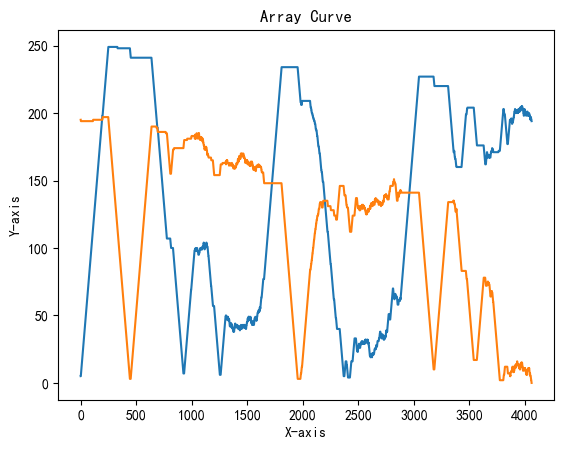

In [169]:
import matplotlib.pyplot as plt

# 创建一个示例数组
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# 绘制曲线
plt.plot(line)

# 添加标题和标签
plt.title("Array Curve")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# 显示图形
plt.show()

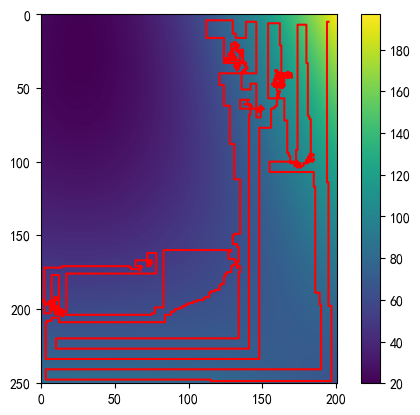

In [171]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

lines = [[5, 195], [5, 194], [6, 194], [7, 194], [8, 194], [9, 194], [10, 194], [11, 194], [12, 194], [13, 194], [14, 194], [15, 194], [16, 194], [17, 194], [18, 194], [19, 194], [20, 194], [21, 194], [22, 194], [23, 194], [24, 194], [25, 194], [26, 194], [27, 194], [28, 194], [29, 194], [30, 194], [31, 194], [32, 194], [33, 194], [34, 194], [35, 194], [36, 194], [37, 194], [38, 194], [39, 194], [40, 194], [41, 194], [42, 194], [43, 194], [44, 194], [45, 194], [46, 194], [47, 194], [48, 194], [49, 194], [50, 194], [51, 194], [52, 194], [53, 194], [54, 194], [55, 194], [56, 194], [57, 194], [58, 194], [59, 194], [60, 194], [61, 194], [62, 194], [63, 194], [64, 194], [65, 194], [66, 194], [67, 194], [68, 194], [69, 194], [70, 194], [71, 194], [72, 194], [73, 194], [74, 194], [75, 194], [76, 194], [77, 194], [78, 194], [79, 194], [80, 194], [81, 194], [82, 194], [83, 194], [84, 194], [85, 194], [86, 194], [87, 194], [88, 194], [89, 194], [90, 194], [91, 194], [92, 194], [93, 194], [94, 194], [95, 194], [96, 194], [97, 194], [98, 194], [99, 194], [100, 194], [101, 194], [102, 194], [103, 194], [104, 194], [105, 194], [106, 194], [107, 194], [108, 194], [109, 194], [110, 194], [111, 194], [112, 194], [113, 194], [114, 194], [114, 195], [115, 195], [116, 195], [117, 195], [118, 195], [119, 195], [120, 195], [121, 195], [122, 195], [123, 195], [124, 195], [125, 195], [126, 195], [127, 195], [128, 195], [129, 195], [130, 195], [131, 195], [132, 195], [133, 195], [134, 195], [135, 195], [136, 195], [137, 195], [138, 195], [139, 195], [140, 195], [141, 195], [142, 195], [143, 195], [144, 195], [145, 195], [146, 195], [147, 195], [148, 195], [149, 195], [150, 195], [151, 195], [152, 195], [153, 195], [154, 195], [155, 195], [156, 195], [157, 195], [158, 195], [159, 195], [160, 195], [161, 195], [162, 195], [163, 195], [164, 195], [165, 195], [166, 195], [167, 195], [168, 195], [169, 195], [170, 195], [171, 195], [172, 195], [173, 195], [174, 195], [175, 195], [176, 195], [177, 195], [178, 195], [179, 195], [180, 195], [181, 195], [182, 195], [183, 195], [184, 195], [185, 195], [186, 195], [187, 195], [188, 195], [189, 195], [190, 195], [191, 195], [192, 195], [193, 195], [194, 195], [195, 195], [196, 195], [197, 195], [198, 195], [198, 196], [198, 197], [199, 197], [200, 197], [201, 197], [202, 197], [203, 197], [204, 197], [205, 197], [206, 197], [207, 197], [208, 197], [209, 197], [210, 197], [211, 197], [212, 197], [213, 197], [214, 197], [215, 197], [216, 197], [217, 197], [218, 197], [219, 197], [220, 197], [221, 197], [222, 197], [223, 197], [224, 197], [225, 197], [226, 197], [227, 197], [228, 197], [229, 197], [230, 197], [231, 197], [232, 197], [233, 197], [234, 197], [235, 197], [236, 197], [237, 197], [238, 197], [239, 197], [240, 197], [241, 197], [242, 197], [243, 197], [244, 197], [245, 197], [246, 197], [247, 197], [248, 197], [249, 197], [249, 196], [249, 195], [249, 194], [249, 193], [249, 192], [249, 191], [249, 190], [249, 189], [249, 188], [249, 187], [249, 186], [249, 185], [249, 184], [249, 183], [249, 182], [249, 181], [249, 180], [249, 179], [249, 178], [249, 177], [249, 176], [249, 175], [249, 174], [249, 173], [249, 172], [249, 171], [249, 170], [249, 169], [249, 168], [249, 167], [249, 166], [249, 165], [249, 164], [249, 163], [249, 162], [249, 161], [249, 160], [249, 159], [249, 158], [249, 157], [249, 156], [249, 155], [249, 154], [249, 153], [249, 152], [249, 151], [249, 150], [249, 149], [249, 148], [249, 147], [249, 146], [249, 145], [249, 144], [249, 143], [249, 142], [249, 141], [249, 140], [249, 139], [249, 138], [249, 137], [249, 136], [249, 135], [249, 134], [249, 133], [249, 132], [249, 131], [249, 130], [249, 129], [249, 128], [249, 127], [249, 126], [249, 125], [249, 124], [249, 123], [249, 122], [249, 121], [249, 120], [249, 119], [249, 118], [249, 117], [249, 116], [249, 115], [248, 115], [248, 114], [248, 113], [248, 112], [248, 111], [248, 110], [248, 109], [248, 108], [248, 107], [248, 106], [248, 105], [248, 104], [248, 103], [248, 102], [248, 101], [248, 100], [248, 99], [248, 98], [248, 97], [248, 96], [248, 95], [248, 94], [248, 93], [248, 92], [248, 91], [248, 90], [248, 89], [248, 88], [248, 87], [248, 86], [248, 85], [248, 84], [248, 83], [248, 82], [248, 81], [248, 80], [248, 79], [248, 78], [248, 77], [248, 76], [248, 75], [248, 74], [248, 73], [248, 72], [248, 71], [248, 70], [248, 69], [248, 68], [248, 67], [248, 66], [248, 65], [248, 64], [248, 63], [248, 62], [248, 61], [248, 60], [248, 59], [248, 58], [248, 57], [248, 56], [248, 55], [248, 54], [248, 53], [248, 52], [248, 51], [248, 50], [248, 49], [248, 48], [248, 47], [248, 46], [248, 45], [248, 44], [248, 43], [248, 42], [248, 41], [248, 40], [248, 39], [248, 38], [248, 37], [248, 36], [248, 35], [248, 34], [248, 33], [248, 32], [248, 31], [248, 30], [248, 29], [248, 28], [248, 27], [248, 26], [248, 25], [248, 24], [248, 23], [248, 22], [248, 21], [248, 20], [248, 19], [248, 18], [248, 17], [248, 16], [248, 15], [248, 14], [248, 13], [248, 12], [248, 11], [248, 10], [248, 9], [248, 8], [248, 7], [248, 6], [248, 5], [248, 4], [248, 3], [247, 3], [246, 3], [245, 3], [244, 3], [243, 3], [242, 3], [241, 3], [241, 4], [241, 5], [241, 6], [241, 7], [241, 8], [241, 9], [241, 10], [241, 11], [241, 12], [241, 13], [241, 14], [241, 15], [241, 16], [241, 17], [241, 18], [241, 19], [241, 20], [241, 21], [241, 22], [241, 23], [241, 24], [241, 25], [241, 26], [241, 27], [241, 28], [241, 29], [241, 30], [241, 31], [241, 32], [241, 33], [241, 34], [241, 35], [241, 36], [241, 37], [241, 38], [241, 39], [241, 40], [241, 41], [241, 42], [241, 43], [241, 44], [241, 45], [241, 46], [241, 47], [241, 48], [241, 49], [241, 50], [241, 51], [241, 52], [241, 53], [241, 54], [241, 55], [241, 56], [241, 57], [241, 58], [241, 59], [241, 60], [241, 61], [241, 62], [241, 63], [241, 64], [241, 65], [241, 66], [241, 67], [241, 68], [241, 69], [241, 70], [241, 71], [241, 72], [241, 73], [241, 74], [241, 75], [241, 76], [241, 77], [241, 78], [241, 79], [241, 80], [241, 81], [241, 82], [241, 83], [241, 84], [241, 85], [241, 86], [241, 87], [241, 88], [241, 89], [241, 90], [241, 91], [241, 92], [241, 93], [241, 94], [241, 95], [241, 96], [241, 97], [241, 98], [241, 99], [241, 100], [241, 101], [241, 102], [241, 103], [241, 104], [241, 105], [241, 106], [241, 107], [241, 108], [241, 109], [241, 110], [241, 111], [241, 112], [241, 113], [241, 114], [241, 115], [241, 116], [241, 117], [241, 118], [241, 119], [241, 120], [241, 121], [241, 122], [241, 123], [241, 124], [241, 125], [241, 126], [241, 127], [241, 128], [241, 129], [241, 130], [241, 131], [241, 132], [241, 133], [241, 134], [241, 135], [241, 136], [241, 137], [241, 138], [241, 139], [241, 140], [241, 141], [241, 142], [241, 143], [241, 144], [241, 145], [241, 146], [241, 147], [241, 148], [241, 149], [241, 150], [241, 151], [241, 152], [241, 153], [241, 154], [241, 155], [241, 156], [241, 157], [241, 158], [241, 159], [241, 160], [241, 161], [241, 162], [241, 163], [241, 164], [241, 165], [241, 166], [241, 167], [241, 168], [241, 169], [241, 170], [241, 171], [241, 172], [241, 173], [241, 174], [241, 175], [241, 176], [241, 177], [241, 178], [241, 179], [241, 180], [241, 181], [241, 182], [241, 183], [241, 184], [241, 185], [241, 186], [241, 187], [241, 188], [241, 189], [241, 190], [240, 190], [239, 190], [238, 190], [237, 190], [236, 190], [235, 190], [234, 190], [233, 190], [232, 190], [231, 190], [230, 190], [229, 190], [228, 190], [227, 190], [226, 190], [225, 190], [224, 190], [223, 190], [222, 190], [221, 190], [220, 190], [219, 190], [218, 190], [217, 190], [216, 190], [215, 190], [214, 190], [213, 190], [212, 190], [211, 190], [210, 190], [209, 190], [208, 190], [207, 190], [206, 190], [205, 190], [204, 190], [203, 190], [202, 190], [201, 190], [200, 190], [199, 190], [198, 190], [197, 190], [197, 189], [196, 189], [195, 189], [194, 189], [193, 189], [192, 189], [191, 189], [190, 189], [189, 189], [189, 188], [189, 187], [189, 186], [188, 186], [187, 186], [186, 186], [185, 186], [184, 186], [183, 186], [182, 186], [181, 186], [180, 186], [179, 186], [178, 186], [177, 186], [176, 186], [175, 186], [174, 186], [173, 186], [172, 186], [171, 186], [170, 186], [169, 186], [168, 186], [167, 186], [166, 186], [165, 186], [164, 186], [163, 186], [162, 186], [161, 186], [160, 186], [159, 186], [158, 186], [157, 186], [156, 186], [155, 186], [154, 186], [153, 186], [152, 186], [151, 186], [150, 186], [149, 186], [148, 186], [147, 186], [146, 186], [145, 186], [144, 186], [143, 186], [142, 186], [141, 186], [140, 186], [139, 186], [138, 186], [137, 186], [136, 186], [135, 186], [134, 186], [133, 186], [132, 186], [131, 186], [130, 186], [129, 186], [128, 186], [127, 186], [126, 186], [125, 186], [124, 186], [123, 186], [122, 186], [121, 186], [120, 186], [119, 186], [118, 186], [117, 186], [117, 185], [116, 185], [115, 185], [114, 185], [113, 185], [112, 185], [111, 185], [110, 185], [109, 185], [108, 185], [107, 185], [107, 184], [107, 183], [107, 182], [107, 181], [107, 180], [107, 179], [107, 178], [107, 177], [107, 176], [107, 175], [107, 174], [107, 173], [107, 172], [107, 171], [107, 170], [107, 169], [107, 168], [107, 167], [107, 166], [107, 165], [107, 164], [107, 163], [107, 162], [107, 161], [107, 160], [107, 159], [107, 158], [107, 157], [107, 156], [107, 155], [106, 155], [105, 155], [104, 155], [103, 155], [102, 155], [101, 155], [100, 155], [100, 156], [100, 157], [100, 158], [100, 159], [100, 160], [100, 161], [100, 162], [100, 163], [100, 164], [100, 165], [100, 166], [100, 167], [100, 168], [100, 169], [100, 170], [100, 171], [100, 172], [100, 173], [99, 173], [98, 173], [97, 173], [96, 173], [95, 173], [94, 173], [93, 173], [92, 173], [92, 174], [91, 174], [90, 174], [89, 174], [88, 174], [87, 174], [86, 174], [85, 174], [84, 174], [83, 174], [82, 174], [81, 174], [80, 174], [79, 174], [78, 174], [77, 174], [76, 174], [75, 174], [74, 174], [73, 174], [72, 174], [71, 174], [70, 174], [69, 174], [68, 174], [67, 174], [66, 174], [65, 174], [64, 174], [63, 174], [62, 174], [61, 174], [60, 174], [59, 174], [58, 174], [57, 174], [56, 174], [55, 174], [54, 174], [53, 174], [52, 174], [51, 174], [50, 174], [49, 174], [48, 174], [47, 174], [46, 174], [45, 174], [44, 174], [43, 174], [42, 174], [41, 174], [40, 174], [39, 174], [38, 174], [37, 174], [36, 174], [35, 174], [34, 174], [33, 174], [32, 174], [31, 174], [30, 174], [29, 174], [28, 174], [27, 174], [26, 174], [25, 174], [24, 174], [23, 174], [22, 174], [21, 174], [20, 174], [19, 174], [18, 174], [17, 174], [16, 174], [15, 174], [14, 174], [13, 174], [12, 174], [11, 174], [10, 174], [9, 174], [8, 174], [7, 174], [7, 175], [7, 176], [7, 177], [7, 178], [7, 179], [7, 180], [8, 180], [9, 180], [10, 180], [11, 180], [12, 180], [13, 180], [14, 180], [15, 180], [16, 180], [17, 180], [18, 180], [19, 180], [20, 180], [21, 180], [22, 180], [23, 180], [24, 180], [25, 180], [26, 180], [27, 180], [28, 180], [29, 180], [30, 180], [31, 180], [32, 180], [33, 180], [33, 181], [34, 181], [35, 181], [36, 181], [37, 181], [38, 181], [39, 181], [40, 181], [41, 181], [42, 181], [43, 181], [44, 181], [45, 181], [46, 181], [47, 181], [48, 181], [49, 181], [50, 181], [51, 181], [52, 181], [53, 181], [54, 181], [55, 181], [56, 181], [57, 181], [58, 181], [59, 181], [60, 181], [61, 181], [62, 181], [63, 181], [64, 181], [65, 181], [66, 181], [67, 181], [68, 181], [69, 181], [69, 182], [70, 182], [71, 182], [71, 183], [72, 183], [73, 183], [74, 183], [75, 183], [76, 183], [77, 183], [78, 183], [79, 183], [80, 183], [81, 183], [82, 183], [83, 183], [84, 183], [85, 183], [86, 183], [87, 183], [88, 183], [89, 183], [90, 183], [91, 183], [92, 183], [93, 183], [94, 183], [95, 183], [96, 183], [97, 183], [98, 183], [98, 182], [98, 181], [99, 181], [99, 182], [99, 183], [99, 184], [99, 183], [99, 182], [100, 182], [100, 181], [99, 181], [98, 181], [98, 182], [99, 182], [99, 183], [98, 183], [98, 184], [99, 184], [99, 185], [98, 185], [99, 185], [99, 184], [100, 184], [99, 184], [98, 184], [98, 183], [98, 184], [98, 183], [97, 183], [97, 182], [97, 181], [97, 182], [96, 182], [95, 182], [95, 183], [95, 184], [95, 185], [95, 184], [95, 185], [96, 185], [96, 184], [96, 183], [97, 183], [97, 182], [97, 181], [98, 181], [99, 181], [99, 182], [99, 181], [99, 180], [99, 181], [100, 181], [100, 182], [100, 181], [99, 181], [100, 181], [100, 182], [100, 181], [99, 181], [99, 180], [100, 180], [100, 181], [100, 182], [100, 181], [99, 181], [99, 180], [100, 180], [99, 180], [100, 180], [101, 180], [101, 179], [101, 180], [100, 180], [100, 181], [101, 181], [101, 180], [101, 179], [101, 178], [102, 178], [103, 178], [103, 177], [103, 176], [104, 176], [103, 176], [102, 176], [101, 176], [101, 175], [101, 174], [100, 174], [100, 173], [99, 173], [100, 173], [100, 174], [100, 173], [101, 173], [102, 173], [101, 173], [100, 173], [101, 173], [102, 173], [102, 174], [102, 173], [102, 174], [102, 175], [102, 174], [103, 174], [104, 174], [103, 174], [103, 173], [103, 172], [102, 172], [101, 172], [101, 171], [101, 170], [101, 169], [101, 170], [101, 169], [100, 169], [99, 169], [98, 169], [97, 169], [96, 169], [96, 168], [95, 168], [94, 168], [94, 167], [93, 167], [92, 167], [91, 167], [90, 167], [89, 167], [88, 167], [87, 167], [86, 167], [85, 167], [84, 167], [83, 167], [82, 167], [81, 167], [80, 167], [79, 167], [78, 167], [77, 167], [76, 167], [75, 167], [74, 167], [73, 167], [72, 167], [72, 166], [72, 165], [71, 165], [70, 165], [69, 165], [68, 165], [67, 165], [66, 165], [65, 165], [64, 165], [63, 165], [62, 165], [61, 165], [60, 165], [59, 165], [58, 165], [57, 165], [57, 164], [57, 163], [57, 162], [57, 161], [57, 160], [57, 159], [57, 158], [57, 157], [57, 156], [57, 155], [57, 154], [56, 154], [55, 154], [54, 154], [53, 154], [52, 154], [51, 154], [50, 154], [49, 154], [48, 154], [47, 154], [46, 154], [45, 154], [44, 154], [43, 154], [42, 154], [41, 154], [40, 154], [39, 154], [38, 154], [37, 154], [36, 154], [35, 154], [34, 154], [33, 154], [32, 154], [31, 154], [30, 154], [29, 154], [28, 154], [27, 154], [26, 154], [25, 154], [24, 154], [23, 154], [22, 154], [21, 154], [20, 154], [19, 154], [18, 154], [17, 154], [16, 154], [15, 154], [14, 154], [13, 154], [12, 154], [11, 154], [10, 154], [9, 154], [8, 154], [7, 154], [6, 154], [6, 155], [6, 156], [6, 157], [6, 158], [6, 159], [6, 160], [6, 161], [6, 162], [7, 162], [8, 162], [9, 162], [10, 162], [11, 162], [12, 162], [13, 162], [14, 162], [15, 162], [16, 162], [17, 162], [18, 162], [19, 162], [20, 162], [21, 162], [21, 163], [22, 163], [23, 163], [24, 163], [25, 163], [26, 163], [27, 163], [28, 163], [29, 163], [30, 163], [31, 163], [32, 163], [33, 163], [34, 163], [35, 163], [36, 163], [37, 163], [38, 163], [39, 163], [40, 163], [41, 163], [42, 163], [43, 163], [44, 163], [45, 163], [46, 163], [47, 163], [48, 163], [49, 163], [49, 164], [50, 164], [50, 163], [50, 162], [50, 163], [49, 163], [49, 164], [48, 164], [48, 165], [47, 165], [48, 165], [48, 164], [49, 164], [49, 165], [48, 165], [48, 164], [48, 163], [49, 163], [48, 163], [47, 163], [48, 163], [49, 163], [48, 163], [47, 163], [48, 163], [47, 163], [47, 162], [46, 162], [47, 162], [47, 163], [47, 162], [47, 161], [47, 162], [46, 162], [45, 162], [45, 163], [44, 163], [43, 163], [42, 163], [42, 162], [43, 162], [42, 162], [43, 162], [42, 162], [43, 162], [44, 162], [43, 162], [43, 161], [44, 161], [43, 161], [43, 162], [44, 162], [43, 162], [42, 162], [42, 163], [41, 163], [42, 163], [43, 163], [43, 162], [43, 161], [42, 161], [41, 161], [41, 162], [40, 162], [40, 161], [41, 161], [40, 161], [40, 160], [39, 160], [38, 160], [38, 159], [38, 160], [39, 160], [39, 161], [39, 160], [38, 160], [38, 159], [39, 159], [39, 160], [40, 160], [41, 160], [41, 159], [41, 160], [41, 159], [42, 159], [43, 159], [44, 159], [43, 159], [43, 160], [42, 160], [43, 160], [42, 160], [43, 160], [42, 160], [42, 161], [43, 161], [43, 162], [42, 162], [42, 163], [43, 163], [42, 163], [42, 162], [41, 162], [42, 162], [43, 162], [43, 163], [42, 163], [41, 163], [41, 164], [42, 164], [42, 165], [42, 166], [41, 166], [40, 166], [40, 165], [41, 165], [42, 165], [42, 164], [42, 165], [42, 166], [42, 167], [42, 168], [42, 167], [41, 167], [41, 166], [41, 167], [40, 167], [40, 168], [39, 168], [39, 167], [40, 167], [41, 167], [41, 166], [41, 167], [41, 168], [42, 168], [42, 169], [42, 170], [43, 170], [42, 170], [41, 170], [40, 170], [40, 169], [40, 168], [40, 169], [41, 169], [42, 169], [42, 170], [41, 170], [41, 169], [41, 168], [42, 168], [41, 168], [42, 168], [43, 168], [42, 168], [42, 169], [41, 169], [42, 169], [42, 170], [42, 169], [42, 168], [42, 167], [43, 167], [42, 167], [42, 168], [43, 168], [43, 167], [42, 167], [43, 167], [42, 167], [42, 166], [41, 166], [42, 166], [41, 166], [42, 166], [42, 165], [42, 164], [42, 163], [42, 164], [41, 164], [40, 164], [40, 165], [40, 164], [40, 165], [41, 165], [42, 165], [43, 165], [43, 164], [43, 165], [44, 165], [44, 164], [45, 164], [45, 165], [45, 164], [45, 163], [46, 163], [47, 163], [47, 162], [47, 163], [48, 163], [47, 163], [46, 163], [46, 164], [46, 163], [47, 163], [48, 163], [49, 163], [48, 163], [49, 163], [48, 163], [48, 162], [49, 162], [48, 162], [47, 162], [47, 161], [48, 161], [48, 162], [47, 162], [47, 161], [48, 161], [48, 162], [48, 161], [49, 161], [49, 162], [48, 162], [48, 163], [48, 164], [47, 164], [47, 163], [46, 163], [45, 163], [46, 163], [45, 163], [44, 163], [45, 163], [44, 163], [44, 164], [44, 163], [43, 163], [44, 163], [44, 162], [44, 161], [43, 161], [44, 161], [44, 160], [44, 161], [44, 160], [44, 159], [44, 158], [45, 158], [46, 158], [45, 158], [45, 159], [44, 159], [43, 159], [44, 159], [45, 159], [45, 158], [46, 158], [47, 158], [48, 158], [48, 159], [48, 160], [48, 159], [48, 158], [49, 158], [49, 159], [49, 158], [48, 158], [48, 157], [47, 157], [48, 157], [48, 158], [48, 159], [47, 159], [47, 160], [46, 160], [47, 160], [47, 161], [47, 160], [48, 160], [48, 161], [49, 161], [49, 160], [50, 160], [51, 160], [52, 160], [52, 161], [52, 160], [52, 161], [52, 160], [52, 161], [53, 161], [52, 161], [52, 162], [53, 162], [53, 161], [54, 161], [54, 160], [54, 161], [54, 160], [54, 161], [54, 160], [54, 161], [53, 161], [54, 161], [55, 161], [56, 161], [55, 161], [56, 161], [55, 161], [55, 160], [56, 160], [57, 160], [58, 160], [59, 160], [60, 160], [61, 160], [62, 160], [62, 159], [63, 159], [63, 158], [64, 158], [64, 157], [64, 156], [65, 156], [66, 156], [67, 156], [68, 156], [69, 156], [70, 156], [71, 156], [72, 156], [73, 156], [74, 156], [75, 156], [76, 156], [77, 156], [77, 155], [77, 154], [77, 153], [77, 152], [77, 151], [77, 150], [77, 149], [77, 148], [78, 148], [79, 148], [80, 148], [81, 148], [82, 148], [83, 148], [84, 148], [85, 148], [86, 148], [87, 148], [88, 148], [89, 148], [90, 148], [91, 148], [92, 148], [93, 148], [94, 148], [95, 148], [96, 148], [97, 148], [98, 148], [99, 148], [100, 148], [101, 148], [102, 148], [103, 148], [104, 148], [105, 148], [106, 148], [107, 148], [108, 148], [109, 148], [110, 148], [111, 148], [112, 148], [113, 148], [114, 148], [115, 148], [116, 148], [117, 148], [118, 148], [119, 148], [120, 148], [121, 148], [122, 148], [123, 148], [124, 148], [125, 148], [126, 148], [127, 148], [128, 148], [129, 148], [130, 148], [131, 148], [132, 148], [133, 148], [134, 148], [135, 148], [136, 148], [137, 148], [138, 148], [139, 148], [140, 148], [141, 148], [142, 148], [143, 148], [144, 148], [145, 148], [146, 148], [147, 148], [148, 148], [149, 148], [150, 148], [151, 148], [152, 148], [153, 148], [154, 148], [155, 148], [156, 148], [157, 148], [158, 148], [159, 148], [160, 148], [161, 148], [162, 148], [163, 148], [164, 148], [165, 148], [166, 148], [167, 148], [168, 148], [169, 148], [170, 148], [171, 148], [172, 148], [173, 148], [174, 148], [175, 148], [176, 148], [177, 148], [178, 148], [179, 148], [180, 148], [181, 148], [182, 148], [183, 148], [184, 148], [185, 148], [186, 148], [187, 148], [188, 148], [189, 148], [190, 148], [191, 148], [192, 148], [193, 148], [194, 148], [195, 148], [196, 148], [197, 148], [198, 148], [199, 148], [200, 148], [201, 148], [202, 148], [203, 148], [204, 148], [205, 148], [206, 148], [207, 148], [208, 148], [209, 148], [210, 148], [211, 148], [212, 148], [213, 148], [214, 148], [215, 148], [216, 148], [217, 148], [218, 148], [219, 148], [220, 148], [221, 148], [222, 148], [223, 148], [224, 148], [225, 148], [226, 148], [227, 148], [228, 148], [229, 148], [230, 148], [231, 148], [232, 148], [233, 148], [234, 148], [234, 147], [234, 146], [234, 145], [234, 144], [234, 143], [234, 142], [234, 141], [234, 140], [234, 139], [234, 138], [234, 137], [234, 136], [234, 135], [234, 134], [234, 133], [234, 132], [234, 131], [234, 130], [234, 129], [234, 128], [234, 127], [234, 126], [234, 125], [234, 124], [234, 123], [234, 122], [234, 121], [234, 120], [234, 119], [234, 118], [234, 117], [234, 116], [234, 115], [234, 114], [234, 113], [234, 112], [234, 111], [234, 110], [234, 109], [234, 108], [234, 107], [234, 106], [234, 105], [234, 104], [234, 103], [234, 102], [234, 101], [234, 100], [234, 99], [234, 98], [234, 97], [234, 96], [234, 95], [234, 94], [234, 93], [234, 92], [234, 91], [234, 90], [234, 89], [234, 88], [234, 87], [234, 86], [234, 85], [234, 84], [234, 83], [234, 82], [234, 81], [234, 80], [234, 79], [234, 78], [234, 77], [234, 76], [234, 75], [234, 74], [234, 73], [234, 72], [234, 71], [234, 70], [234, 69], [234, 68], [234, 67], [234, 66], [234, 65], [234, 64], [234, 63], [234, 62], [234, 61], [234, 60], [234, 59], [234, 58], [234, 57], [234, 56], [234, 55], [234, 54], [234, 53], [234, 52], [234, 51], [234, 50], [234, 49], [234, 48], [234, 47], [234, 46], [234, 45], [234, 44], [234, 43], [234, 42], [234, 41], [234, 40], [234, 39], [234, 38], [234, 37], [234, 36], [234, 35], [234, 34], [234, 33], [234, 32], [234, 31], [234, 30], [234, 29], [234, 28], [234, 27], [234, 26], [234, 25], [234, 24], [234, 23], [234, 22], [234, 21], [234, 20], [234, 19], [234, 18], [234, 17], [234, 16], [234, 15], [234, 14], [234, 13], [234, 12], [234, 11], [234, 10], [234, 9], [234, 8], [234, 7], [234, 6], [234, 5], [234, 4], [234, 3], [233, 3], [232, 3], [231, 3], [230, 3], [229, 3], [228, 3], [227, 3], [226, 3], [225, 3], [224, 3], [223, 3], [222, 3], [221, 3], [220, 3], [219, 3], [218, 3], [217, 3], [216, 3], [215, 3], [214, 3], [213, 3], [212, 3], [211, 3], [210, 3], [209, 3], [209, 4], [208, 4], [208, 5], [208, 6], [208, 7], [207, 7], [206, 7], [206, 8], [206, 9], [206, 10], [206, 11], [206, 12], [207, 12], [208, 12], [209, 12], [209, 13], [209, 14], [209, 15], [209, 16], [209, 17], [209, 18], [209, 19], [209, 20], [209, 21], [209, 22], [209, 23], [209, 24], [209, 25], [209, 26], [209, 27], [209, 28], [209, 29], [209, 30], [209, 31], [209, 32], [209, 33], [209, 34], [209, 35], [209, 36], [209, 37], [209, 38], [209, 39], [209, 40], [209, 41], [209, 42], [209, 43], [209, 44], [209, 45], [209, 46], [209, 47], [209, 48], [209, 49], [209, 50], [209, 51], [209, 52], [209, 53], [209, 54], [209, 55], [209, 56], [209, 57], [209, 58], [209, 59], [209, 60], [209, 61], [209, 62], [209, 63], [209, 64], [209, 65], [209, 66], [209, 67], [209, 68], [209, 69], [209, 70], [209, 71], [209, 72], [209, 73], [209, 74], [209, 75], [209, 76], [209, 77], [209, 78], [209, 79], [209, 80], [209, 81], [209, 82], [209, 83], [209, 84], [208, 84], [207, 84], [206, 84], [205, 84], [204, 84], [204, 85], [204, 86], [204, 87], [204, 88], [203, 88], [202, 88], [202, 89], [202, 90], [201, 90], [201, 91], [200, 91], [200, 92], [200, 93], [200, 94], [199, 94], [199, 95], [199, 96], [198, 96], [198, 97], [198, 98], [197, 98], [197, 99], [197, 100], [196, 100], [196, 101], [196, 102], [196, 103], [195, 103], [195, 104], [195, 105], [195, 106], [194, 106], [194, 107], [194, 108], [194, 109], [194, 110], [193, 110], [193, 111], [192, 111], [192, 112], [192, 113], [192, 114], [191, 114], [190, 114], [189, 114], [189, 115], [188, 115], [188, 116], [188, 117], [188, 118], [187, 118], [187, 119], [187, 120], [187, 121], [186, 121], [185, 121], [184, 121], [184, 122], [183, 122], [183, 123], [183, 124], [182, 124], [181, 124], [180, 124], [179, 124], [178, 124], [178, 125], [177, 125], [176, 125], [176, 126], [175, 126], [175, 127], [175, 128], [175, 129], [174, 129], [173, 129], [172, 129], [171, 129], [171, 130], [170, 130], [170, 131], [170, 132], [170, 133], [169, 133], [168, 133], [168, 134], [167, 134], [166, 134], [165, 134], [164, 134], [163, 134], [162, 134], [161, 134], [160, 134], [159, 134], [158, 134], [158, 133], [157, 133], [156, 133], [156, 132], [156, 131], [156, 130], [155, 130], [154, 130], [153, 130], [152, 130], [151, 130], [150, 130], [150, 131], [149, 131], [149, 132], [149, 133], [149, 134], [149, 135], [148, 135], [147, 135], [146, 135], [145, 135], [144, 135], [143, 135], [142, 135], [141, 135], [140, 135], [139, 135], [138, 135], [137, 135], [136, 135], [135, 135], [134, 135], [133, 135], [132, 135], [131, 135], [130, 135], [129, 135], [128, 135], [127, 135], [126, 135], [125, 135], [124, 135], [123, 135], [122, 135], [121, 135], [120, 135], [119, 135], [118, 135], [117, 135], [116, 135], [115, 135], [114, 135], [113, 135], [112, 135], [112, 134], [112, 133], [112, 132], [112, 131], [111, 131], [110, 131], [109, 131], [108, 131], [107, 131], [106, 131], [105, 131], [104, 131], [103, 131], [102, 131], [101, 131], [100, 131], [99, 131], [98, 131], [97, 131], [96, 131], [95, 131], [94, 131], [93, 131], [92, 131], [91, 131], [90, 131], [89, 131], [88, 131], [88, 130], [88, 129], [88, 128], [87, 128], [86, 128], [85, 128], [84, 128], [83, 128], [82, 128], [81, 128], [80, 128], [79, 128], [78, 128], [77, 128], [76, 128], [75, 128], [74, 128], [73, 128], [72, 128], [71, 128], [70, 128], [69, 128], [68, 128], [67, 128], [66, 128], [65, 128], [64, 128], [63, 128], [62, 128], [62, 127], [62, 126], [62, 125], [62, 124], [61, 124], [60, 124], [59, 124], [58, 124], [57, 124], [56, 124], [55, 124], [54, 124], [53, 124], [52, 124], [51, 124], [50, 124], [49, 124], [48, 124], [48, 123], [48, 122], [48, 121], [47, 121], [46, 121], [45, 121], [44, 121], [43, 121], [42, 121], [41, 121], [40, 121], [40, 122], [40, 123], [40, 124], [40, 125], [40, 126], [40, 127], [40, 128], [40, 129], [40, 130], [40, 131], [40, 132], [40, 133], [40, 134], [40, 135], [40, 136], [40, 137], [40, 138], [40, 139], [40, 140], [40, 141], [40, 142], [40, 143], [40, 144], [40, 145], [40, 146], [39, 146], [38, 146], [37, 146], [36, 146], [35, 146], [34, 146], [33, 146], [32, 146], [31, 146], [30, 146], [29, 146], [28, 146], [27, 146], [26, 146], [25, 146], [24, 146], [23, 146], [22, 146], [21, 146], [20, 146], [19, 146], [18, 146], [17, 146], [16, 146], [15, 146], [14, 146], [13, 146], [12, 146], [11, 146], [10, 146], [9, 146], [8, 146], [7, 146], [6, 146], [5, 146], [5, 145], [5, 144], [5, 143], [5, 142], [5, 141], [5, 140], [5, 139], [6, 139], [7, 139], [8, 139], [9, 139], [10, 139], [11, 139], [12, 139], [13, 139], [14, 139], [15, 139], [16, 139], [16, 138], [16, 137], [16, 136], [16, 135], [16, 134], [16, 133], [16, 132], [15, 132], [14, 132], [13, 132], [13, 131], [13, 130], [12, 130], [11, 130], [10, 130], [9, 130], [8, 130], [7, 130], [6, 130], [5, 130], [4, 130], [4, 129], [4, 128], [4, 127], [4, 126], [4, 125], [4, 124], [4, 123], [4, 122], [4, 121], [4, 120], [4, 119], [4, 118], [4, 117], [4, 116], [4, 115], [4, 114], [4, 113], [4, 112], [5, 112], [6, 112], [7, 112], [8, 112], [9, 112], [10, 112], [11, 112], [12, 112], [13, 112], [14, 112], [15, 112], [16, 112], [16, 113], [16, 114], [16, 115], [16, 116], [16, 117], [16, 118], [16, 119], [16, 120], [16, 121], [16, 122], [16, 123], [16, 124], [17, 124], [18, 124], [19, 124], [20, 124], [21, 124], [22, 124], [23, 124], [24, 124], [25, 124], [26, 124], [27, 124], [28, 124], [29, 124], [30, 124], [31, 124], [32, 124], [33, 124], [33, 125], [33, 126], [33, 127], [33, 128], [33, 129], [33, 130], [33, 131], [33, 132], [33, 133], [33, 134], [33, 135], [33, 136], [33, 137], [32, 137], [31, 137], [30, 137], [29, 137], [28, 137], [27, 137], [26, 137], [25, 137], [24, 137], [24, 136], [24, 135], [24, 134], [24, 133], [23, 133], [23, 132], [23, 131], [23, 130], [24, 130], [25, 130], [26, 130], [27, 130], [27, 131], [27, 130], [27, 129], [28, 129], [28, 130], [29, 130], [29, 131], [28, 131], [28, 130], [27, 130], [27, 129], [27, 128], [27, 129], [26, 129], [26, 128], [26, 129], [26, 128], [27, 128], [27, 129], [28, 129], [28, 130], [29, 130], [30, 130], [30, 131], [30, 130], [30, 131], [29, 131], [29, 130], [29, 131], [29, 130], [30, 130], [30, 131], [31, 131], [31, 132], [31, 131], [31, 130], [30, 130], [30, 129], [30, 130], [30, 131], [30, 132], [29, 132], [30, 132], [30, 131], [29, 131], [30, 131], [29, 131], [30, 131], [30, 130], [29, 130], [29, 131], [29, 130], [30, 130], [31, 130], [31, 129], [31, 130], [30, 130], [29, 130], [29, 129], [30, 129], [31, 129], [31, 128], [32, 128], [31, 128], [31, 127], [32, 127], [31, 127], [31, 126], [32, 126], [32, 125], [32, 126], [31, 126], [30, 126], [30, 125], [30, 126], [31, 126], [30, 126], [30, 125], [30, 126], [31, 126], [32, 126], [32, 127], [32, 128], [31, 128], [32, 128], [31, 128], [30, 128], [30, 129], [30, 128], [30, 127], [29, 127], [30, 127], [29, 127], [28, 127], [27, 127], [27, 128], [27, 129], [26, 129], [25, 129], [24, 129], [23, 129], [22, 129], [21, 129], [20, 129], [20, 130], [20, 131], [20, 130], [20, 129], [20, 130], [20, 131], [19, 131], [20, 131], [20, 132], [20, 133], [21, 133], [20, 133], [20, 132], [20, 133], [21, 133], [21, 132], [20, 132], [21, 132], [20, 132], [19, 132], [20, 132], [21, 132], [22, 132], [21, 132], [21, 131], [21, 132], [21, 133], [21, 134], [21, 133], [22, 133], [21, 133], [21, 134], [21, 133], [21, 134], [22, 134], [22, 133], [22, 134], [22, 133], [22, 132], [23, 132], [24, 132], [25, 132], [25, 133], [25, 134], [25, 135], [25, 136], [25, 135], [25, 134], [26, 134], [26, 135], [26, 136], [25, 136], [25, 137], [25, 136], [25, 135], [26, 135], [27, 135], [27, 136], [28, 136], [28, 135], [27, 135], [28, 135], [27, 135], [27, 136], [27, 135], [28, 135], [29, 135], [30, 135], [31, 135], [31, 134], [31, 135], [31, 134], [31, 135], [31, 134], [31, 135], [31, 134], [31, 135], [31, 134], [31, 133], [31, 132], [32, 132], [33, 132], [33, 133], [33, 134], [33, 133], [33, 134], [34, 134], [35, 134], [36, 134], [37, 134], [37, 133], [37, 134], [37, 133], [38, 133], [37, 133], [37, 132], [36, 132], [36, 133], [36, 132], [35, 132], [35, 131], [35, 132], [36, 132], [35, 132], [34, 132], [33, 132], [33, 133], [34, 133], [34, 132], [34, 133], [35, 133], [35, 132], [36, 132], [36, 133], [35, 133], [35, 134], [34, 134], [34, 135], [33, 135], [34, 135], [35, 135], [35, 134], [34, 134], [33, 134], [33, 135], [32, 135], [32, 136], [32, 137], [32, 138], [33, 138], [34, 138], [34, 139], [34, 138], [34, 139], [33, 139], [34, 139], [33, 139], [34, 139], [35, 139], [35, 138], [34, 138], [34, 139], [35, 139], [36, 139], [36, 140], [37, 140], [37, 139], [37, 138], [38, 138], [39, 138], [38, 138], [39, 138], [39, 139], [39, 138], [39, 137], [38, 137], [39, 137], [39, 136], [40, 136], [41, 136], [42, 136], [43, 136], [44, 136], [45, 136], [46, 136], [47, 136], [48, 136], [49, 136], [50, 136], [51, 136], [51, 137], [51, 138], [51, 139], [51, 140], [51, 141], [51, 142], [50, 142], [49, 142], [48, 142], [47, 142], [47, 143], [47, 144], [47, 145], [47, 146], [48, 146], [49, 146], [50, 146], [51, 146], [52, 146], [53, 146], [54, 146], [55, 146], [56, 146], [57, 146], [58, 146], [59, 146], [60, 146], [61, 146], [62, 146], [63, 146], [64, 146], [65, 146], [66, 146], [67, 146], [68, 146], [69, 146], [70, 146], [70, 147], [70, 148], [70, 149], [69, 149], [68, 149], [67, 149], [66, 149], [65, 149], [65, 150], [64, 150], [64, 151], [64, 150], [63, 150], [63, 149], [62, 149], [63, 149], [63, 148], [64, 148], [63, 148], [64, 148], [65, 148], [66, 148], [66, 147], [65, 147], [64, 147], [64, 146], [64, 145], [64, 144], [64, 143], [64, 142], [64, 141], [64, 140], [64, 139], [64, 138], [64, 137], [64, 136], [64, 135], [63, 135], [62, 135], [61, 135], [60, 135], [59, 135], [58, 135], [58, 136], [58, 137], [58, 138], [58, 139], [58, 140], [58, 141], [58, 140], [59, 140], [60, 140], [61, 140], [61, 139], [61, 138], [61, 139], [61, 140], [61, 141], [61, 140], [61, 141], [62, 141], [61, 141], [62, 141], [62, 142], [61, 142], [62, 142], [63, 142], [63, 143], [62, 143], [62, 142], [63, 142], [64, 142], [65, 142], [66, 142], [67, 142], [68, 142], [68, 141], [69, 141], [70, 141], [71, 141], [72, 141], [73, 141], [74, 141], [75, 141], [76, 141], [77, 141], [78, 141], [79, 141], [80, 141], [81, 141], [82, 141], [83, 141], [84, 141], [85, 141], [86, 141], [87, 141], [88, 141], [89, 141], [90, 141], [91, 141], [92, 141], [93, 141], [94, 141], [95, 141], [96, 141], [97, 141], [98, 141], [99, 141], [100, 141], [101, 141], [102, 141], [103, 141], [104, 141], [105, 141], [106, 141], [107, 141], [108, 141], [109, 141], [110, 141], [111, 141], [112, 141], [113, 141], [114, 141], [115, 141], [116, 141], [117, 141], [118, 141], [119, 141], [120, 141], [121, 141], [122, 141], [123, 141], [124, 141], [125, 141], [126, 141], [127, 141], [128, 141], [129, 141], [130, 141], [131, 141], [132, 141], [133, 141], [134, 141], [135, 141], [136, 141], [137, 141], [138, 141], [139, 141], [140, 141], [141, 141], [142, 141], [143, 141], [144, 141], [145, 141], [146, 141], [147, 141], [148, 141], [149, 141], [150, 141], [151, 141], [152, 141], [153, 141], [154, 141], [155, 141], [156, 141], [157, 141], [158, 141], [159, 141], [160, 141], [161, 141], [162, 141], [163, 141], [164, 141], [165, 141], [166, 141], [167, 141], [168, 141], [169, 141], [170, 141], [171, 141], [172, 141], [173, 141], [174, 141], [175, 141], [176, 141], [177, 141], [178, 141], [179, 141], [180, 141], [181, 141], [182, 141], [183, 141], [184, 141], [185, 141], [186, 141], [187, 141], [188, 141], [189, 141], [190, 141], [191, 141], [192, 141], [193, 141], [194, 141], [195, 141], [196, 141], [197, 141], [198, 141], [199, 141], [200, 141], [201, 141], [202, 141], [203, 141], [204, 141], [205, 141], [206, 141], [207, 141], [208, 141], [209, 141], [210, 141], [211, 141], [212, 141], [213, 141], [214, 141], [215, 141], [216, 141], [217, 141], [218, 141], [219, 141], [220, 141], [221, 141], [222, 141], [223, 141], [224, 141], [225, 141], [226, 141], [227, 141], [227, 140], [227, 139], [227, 138], [227, 137], [227, 136], [227, 135], [227, 134], [227, 133], [227, 132], [227, 131], [227, 130], [227, 129], [227, 128], [227, 127], [227, 126], [227, 125], [227, 124], [227, 123], [227, 122], [227, 121], [227, 120], [227, 119], [227, 118], [227, 117], [227, 116], [227, 115], [227, 114], [227, 113], [227, 112], [227, 111], [227, 110], [227, 109], [227, 108], [227, 107], [227, 106], [227, 105], [227, 104], [227, 103], [227, 102], [227, 101], [227, 100], [227, 99], [227, 98], [227, 97], [227, 96], [227, 95], [227, 94], [227, 93], [227, 92], [227, 91], [227, 90], [227, 89], [227, 88], [227, 87], [227, 86], [227, 85], [227, 84], [227, 83], [227, 82], [227, 81], [227, 80], [227, 79], [227, 78], [227, 77], [227, 76], [227, 75], [227, 74], [227, 73], [227, 72], [227, 71], [227, 70], [227, 69], [227, 68], [227, 67], [227, 66], [227, 65], [227, 64], [227, 63], [227, 62], [227, 61], [227, 60], [227, 59], [227, 58], [227, 57], [227, 56], [227, 55], [227, 54], [227, 53], [227, 52], [227, 51], [227, 50], [227, 49], [227, 48], [227, 47], [227, 46], [227, 45], [227, 44], [227, 43], [227, 42], [227, 41], [227, 40], [227, 39], [227, 38], [227, 37], [227, 36], [227, 35], [227, 34], [227, 33], [227, 32], [227, 31], [227, 30], [227, 29], [227, 28], [227, 27], [227, 26], [227, 25], [227, 24], [227, 23], [227, 22], [227, 21], [227, 20], [227, 19], [227, 18], [227, 17], [227, 16], [227, 15], [227, 14], [227, 13], [227, 12], [227, 11], [227, 10], [226, 10], [225, 10], [224, 10], [223, 10], [222, 10], [221, 10], [220, 10], [220, 11], [220, 12], [220, 13], [220, 14], [220, 15], [220, 16], [220, 17], [220, 18], [220, 19], [220, 20], [220, 21], [220, 22], [220, 23], [220, 24], [220, 25], [220, 26], [220, 27], [220, 28], [220, 29], [220, 30], [220, 31], [220, 32], [220, 33], [220, 34], [220, 35], [220, 36], [220, 37], [220, 38], [220, 39], [220, 40], [220, 41], [220, 42], [220, 43], [220, 44], [220, 45], [220, 46], [220, 47], [220, 48], [220, 49], [220, 50], [220, 51], [220, 52], [220, 53], [220, 54], [220, 55], [220, 56], [220, 57], [220, 58], [220, 59], [220, 60], [220, 61], [220, 62], [220, 63], [220, 64], [220, 65], [220, 66], [220, 67], [220, 68], [220, 69], [220, 70], [220, 71], [220, 72], [220, 73], [220, 74], [220, 75], [220, 76], [220, 77], [220, 78], [220, 79], [220, 80], [220, 81], [220, 82], [220, 83], [220, 84], [220, 85], [220, 86], [220, 87], [220, 88], [220, 89], [220, 90], [220, 91], [220, 92], [220, 93], [220, 94], [220, 95], [220, 96], [220, 97], [220, 98], [220, 99], [220, 100], [220, 101], [220, 102], [220, 103], [220, 104], [220, 105], [220, 106], [220, 107], [220, 108], [220, 109], [220, 110], [220, 111], [220, 112], [220, 113], [220, 114], [220, 115], [220, 116], [220, 117], [220, 118], [220, 119], [220, 120], [220, 121], [220, 122], [220, 123], [220, 124], [220, 125], [220, 126], [220, 127], [220, 128], [220, 129], [220, 130], [220, 131], [220, 132], [220, 133], [220, 134], [219, 134], [218, 134], [217, 134], [216, 134], [215, 134], [214, 134], [213, 134], [212, 134], [211, 134], [210, 134], [209, 134], [208, 134], [207, 134], [206, 134], [205, 134], [204, 134], [203, 134], [202, 134], [201, 134], [200, 134], [199, 134], [198, 134], [197, 134], [196, 134], [195, 134], [194, 134], [193, 134], [192, 134], [191, 134], [190, 134], [189, 134], [188, 134], [187, 134], [186, 134], [185, 134], [184, 134], [183, 134], [182, 134], [181, 134], [180, 134], [179, 134], [178, 134], [177, 134], [176, 134], [175, 134], [175, 135], [174, 135], [173, 135], [172, 135], [171, 135], [171, 134], [171, 135], [171, 134], [171, 133], [172, 133], [171, 133], [170, 133], [169, 133], [169, 132], [168, 132], [167, 132], [167, 131], [166, 131], [166, 130], [166, 129], [166, 128], [166, 127], [165, 127], [164, 127], [163, 127], [162, 127], [161, 127], [161, 128], [161, 129], [160, 129], [160, 128], [160, 127], [160, 126], [160, 125], [160, 124], [160, 123], [160, 122], [160, 121], [160, 120], [160, 119], [160, 118], [160, 117], [160, 116], [160, 115], [160, 114], [160, 113], [160, 112], [160, 111], [160, 110], [160, 109], [160, 108], [160, 107], [160, 106], [160, 105], [160, 104], [160, 103], [160, 102], [160, 101], [160, 100], [160, 99], [160, 98], [160, 97], [160, 96], [160, 95], [160, 94], [160, 93], [160, 92], [160, 91], [160, 90], [160, 89], [160, 88], [160, 87], [160, 86], [160, 85], [160, 84], [160, 83], [161, 83], [162, 83], [163, 83], [164, 83], [165, 83], [166, 83], [167, 83], [168, 83], [169, 83], [170, 83], [171, 83], [172, 83], [173, 83], [174, 83], [175, 83], [176, 83], [177, 83], [178, 83], [179, 83], [180, 83], [181, 83], [182, 83], [183, 83], [184, 83], [185, 83], [186, 83], [187, 83], [188, 83], [189, 83], [190, 83], [191, 83], [192, 83], [193, 83], [194, 83], [195, 83], [196, 83], [197, 83], [198, 83], [199, 83], [199, 82], [199, 81], [199, 80], [199, 79], [199, 78], [199, 77], [200, 77], [201, 77], [202, 77], [203, 77], [203, 76], [203, 75], [204, 75], [204, 74], [204, 73], [204, 72], [204, 71], [204, 70], [204, 69], [204, 68], [204, 67], [204, 66], [204, 65], [204, 64], [204, 63], [204, 62], [204, 61], [204, 60], [204, 59], [204, 58], [204, 57], [204, 56], [204, 55], [204, 54], [204, 53], [204, 52], [204, 51], [204, 50], [204, 49], [204, 48], [204, 47], [204, 46], [204, 45], [204, 44], [204, 43], [204, 42], [204, 41], [204, 40], [204, 39], [204, 38], [204, 37], [204, 36], [204, 35], [204, 34], [204, 33], [204, 32], [204, 31], [204, 30], [204, 29], [204, 28], [204, 27], [204, 26], [204, 25], [204, 24], [204, 23], [204, 22], [204, 21], [204, 20], [204, 19], [204, 18], [204, 17], [203, 17], [202, 17], [201, 17], [200, 17], [199, 17], [198, 17], [197, 17], [196, 17], [195, 17], [194, 17], [193, 17], [192, 17], [191, 17], [190, 17], [189, 17], [188, 17], [187, 17], [186, 17], [185, 17], [184, 17], [183, 17], [182, 17], [181, 17], [180, 17], [179, 17], [178, 17], [177, 17], [176, 17], [176, 18], [176, 19], [176, 20], [176, 21], [176, 22], [176, 23], [176, 24], [176, 25], [176, 26], [176, 27], [176, 28], [176, 29], [176, 30], [176, 31], [176, 32], [176, 33], [176, 34], [176, 35], [176, 36], [176, 37], [176, 38], [176, 39], [176, 40], [176, 41], [176, 42], [176, 43], [176, 44], [176, 45], [176, 46], [176, 47], [176, 48], [176, 49], [176, 50], [176, 51], [176, 52], [176, 53], [176, 54], [176, 55], [176, 56], [176, 57], [176, 58], [176, 59], [176, 60], [176, 61], [176, 62], [176, 63], [176, 64], [176, 65], [176, 66], [176, 67], [176, 68], [176, 69], [176, 70], [176, 71], [176, 72], [176, 73], [176, 74], [176, 75], [176, 76], [176, 77], [176, 78], [175, 78], [174, 78], [173, 78], [172, 78], [171, 78], [170, 78], [169, 78], [168, 78], [167, 78], [166, 78], [165, 78], [164, 78], [163, 78], [162, 78], [162, 77], [162, 76], [162, 75], [162, 74], [162, 73], [162, 72], [163, 72], [164, 72], [165, 72], [166, 72], [167, 72], [168, 72], [169, 72], [170, 72], [171, 72], [171, 73], [171, 74], [170, 74], [169, 74], [168, 74], [167, 74], [167, 75], [168, 75], [168, 74], [169, 74], [169, 75], [169, 74], [168, 74], [169, 74], [168, 74], [168, 73], [168, 74], [168, 73], [169, 73], [168, 73], [167, 73], [168, 73], [167, 73], [167, 72], [167, 71], [167, 70], [167, 69], [167, 68], [167, 67], [167, 66], [167, 65], [167, 64], [168, 64], [169, 64], [170, 64], [171, 64], [171, 65], [171, 66], [171, 67], [171, 68], [172, 68], [172, 67], [171, 67], [171, 68], [172, 68], [172, 67], [173, 67], [174, 67], [173, 67], [173, 66], [173, 65], [173, 64], [173, 63], [173, 62], [173, 61], [172, 61], [172, 60], [171, 60], [171, 59], [171, 58], [171, 57], [171, 56], [171, 55], [171, 54], [171, 53], [171, 52], [171, 51], [171, 50], [171, 49], [171, 48], [171, 47], [171, 46], [171, 45], [171, 44], [171, 43], [171, 42], [171, 41], [171, 40], [171, 39], [171, 38], [171, 37], [171, 36], [171, 35], [171, 34], [171, 33], [171, 32], [171, 31], [171, 30], [171, 29], [171, 28], [171, 27], [171, 26], [171, 25], [171, 24], [171, 23], [171, 22], [171, 21], [171, 20], [171, 19], [171, 18], [171, 17], [171, 16], [171, 15], [171, 14], [172, 14], [172, 13], [172, 12], [172, 11], [172, 10], [172, 9], [172, 8], [172, 7], [172, 6], [172, 5], [172, 4], [172, 3], [172, 2], [173, 2], [174, 2], [175, 2], [176, 2], [177, 2], [178, 2], [179, 2], [180, 2], [181, 2], [182, 2], [183, 2], [184, 2], [185, 2], [186, 2], [187, 2], [188, 2], [189, 2], [190, 2], [191, 2], [192, 2], [193, 2], [194, 2], [195, 2], [196, 2], [197, 2], [198, 2], [199, 2], [200, 2], [201, 2], [202, 2], [203, 2], [203, 3], [203, 4], [203, 5], [203, 6], [202, 6], [201, 6], [200, 6], [199, 6], [199, 7], [199, 8], [199, 9], [199, 10], [199, 11], [199, 12], [198, 12], [197, 12], [196, 12], [195, 12], [194, 12], [193, 12], [192, 12], [191, 12], [190, 12], [189, 12], [188, 12], [187, 12], [186, 12], [185, 12], [184, 12], [183, 12], [182, 12], [181, 12], [180, 12], [179, 12], [178, 12], [177, 12], [177, 11], [177, 10], [177, 9], [177, 8], [177, 7], [178, 7], [179, 7], [180, 7], [181, 7], [182, 7], [183, 7], [184, 7], [185, 7], [186, 7], [187, 7], [188, 7], [189, 7], [190, 7], [191, 7], [192, 7], [193, 7], [194, 7], [195, 7], [195, 6], [195, 5], [195, 6], [195, 5], [195, 6], [195, 7], [194, 7], [194, 8], [195, 8], [194, 8], [195, 8], [196, 8], [196, 9], [195, 9], [194, 9], [195, 9], [194, 9], [193, 9], [192, 9], [192, 10], [192, 11], [193, 11], [193, 12], [194, 12], [193, 12], [194, 12], [194, 11], [194, 10], [194, 9], [195, 9], [196, 9], [196, 8], [196, 9], [197, 9], [197, 8], [197, 9], [198, 9], [199, 9], [200, 9], [201, 9], [201, 10], [201, 11], [201, 12], [201, 13], [202, 13], [203, 13], [203, 12], [202, 12], [201, 12], [201, 11], [202, 11], [202, 12], [201, 12], [200, 12], [200, 13], [200, 14], [201, 14], [200, 14], [200, 13], [201, 13], [201, 14], [202, 14], [202, 13], [202, 14], [202, 15], [202, 16], [202, 15], [201, 15], [201, 14], [200, 14], [201, 14], [200, 14], [201, 14], [201, 13], [202, 13], [202, 14], [203, 14], [203, 13], [203, 14], [203, 13], [203, 12], [203, 11], [202, 11], [201, 11], [201, 12], [202, 12], [201, 12], [201, 11], [202, 11], [202, 10], [203, 10], [204, 10], [203, 10], [203, 11], [202, 11], [202, 12], [202, 13], [202, 12], [202, 13], [202, 14], [203, 14], [203, 15], [204, 15], [204, 14], [204, 15], [205, 15], [204, 15], [205, 15], [205, 14], [205, 15], [205, 14], [204, 14], [204, 13], [204, 12], [203, 12], [203, 11], [203, 10], [203, 9], [202, 9], [201, 9], [200, 9], [200, 10], [200, 11], [199, 11], [198, 11], [198, 10], [198, 11], [199, 11], [200, 11], [201, 11], [202, 11], [203, 11], [202, 11], [201, 11], [201, 10], [201, 11], [201, 10], [201, 9], [200, 9], [200, 10], [201, 10], [200, 10], [200, 9], [200, 8], [199, 8], [199, 7], [198, 7], [199, 7], [200, 7], [200, 6], [200, 7], [200, 6], [201, 6], [201, 7], [200, 7], [200, 8], [200, 9], [201, 9], [201, 10], [200, 10], [199, 10], [200, 10], [199, 10], [198, 10], [199, 10], [199, 11], [199, 10], [198, 10], [199, 10], [200, 10], [200, 11], [200, 10], [200, 11], [199, 11], [199, 10], [199, 9], [199, 8], [198, 8], [198, 7], [198, 6], [198, 7], [197, 7], [197, 6], [196, 6], [196, 5], [195, 5], [196, 5], [197, 5], [197, 4], [197, 3], [196, 3], [196, 2], [195, 2], [195, 1], [194, 1], [194, 0]]
# 转换为numpy数组
lines_arr = np.array(lines)

# 分别获取x和y坐标数组
x_coords = lines_arr[:, 0]
y_coords = lines_arr[:, 1]

data = pd.read_excel("data1.xlsx", header=None)
matrix_data = np.array(data.values)

plt.imshow(matrix_data, cmap='viridis')  # 使用'viridis'颜色映射

# 绘制直线
plt.plot(y_coords,x_coords , color='red')

plt.colorbar()  # 添加颜色条
plt.show()

In [175]:
import numpy as np

def update_radius_matrix(radius_matrix, adj_matrix):
    assert radius_matrix.shape == adj_matrix.shape, "输入矩阵尺寸不匹配"
    
    updated_radius_matrix = np.where(adj_matrix != 0, 0, radius_matrix)
    
    return updated_radius_matrix

radius_matrix = np.array([[1, 2, 3],
                          [4, 5, 6],
                          [7, 8, 9]])

adj_matrix = np.array([[0, 1, 0],
                       [1, 0, 1],
                       [0, 1, 0]])

updated_radius_matrix = update_radius_matrix(radius_matrix, adj_matrix)
print(updated_radius_matrix)



[[1 0 3]
 [0 5 0]
 [7 0 9]]


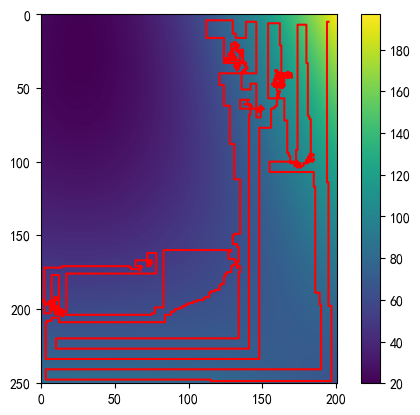

In [181]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

[[5, 195], [4, 195], [5, 195], [4, 195], [4, 194], [3, 194], [4, 194], [5, 194], [5, 195], [4, 195], [3, 195], [4, 195], [5, 195], [6, 195], [6, 194], [7, 194], [8, 194], [8, 195], [8, 194], [8, 193], [9, 193], [10, 193], [11, 193], [11, 192], [11, 191], [12, 191], [12, 192], [13, 192], [13, 191], [13, 190], [13, 191], [14, 191], [14, 192], [13, 192], [14, 192], [14, 193], [14, 192], [13, 192], [14, 192], [14, 191], [14, 190], [13, 190], [13, 189], [13, 190], [13, 191], [13, 192], [14, 192], [14, 193], [14, 194], [13, 194], [14, 194], [13, 194], [12, 194], [12, 193], [13, 193], [13, 192], [14, 192], [15, 192], [14, 192], [13, 192], [13, 193], [13, 194], [14, 194], [15, 194], [16, 194], [17, 194], [17, 193], [17, 194], [17, 195], [18, 195], [18, 194], [17, 194], [16, 194], [15, 194], [16, 194], [16, 193], [15, 193], [15, 192], [14, 192], [13, 192], [13, 193], [13, 194], [13, 193], [12, 193], [12, 192], [13, 192], [12, 192], [11, 192], [11, 191], [11, 192], [10, 192], [9, 192], [8, 192], [8, 191], [8, 190], [8, 189], [8, 188], [8, 187], [8, 186], [8, 185], [7, 185], [8, 185], [9, 185], [10, 185], [10, 186], [10, 185], [10, 184], [9, 184], [10, 184], [10, 183], [9, 183], [8, 183], [8, 184], [7, 184], [7, 185], [7, 186], [6, 186], [5, 186], [4, 186], [3, 186], [3, 185], [2, 185], [2, 184], [1, 184], [1, 185], [2, 185], [3, 185], [2, 185], [2, 184], [3, 184], [3, 183], [4, 183], [4, 182], [4, 181], [5, 181], [4, 181], [3, 181], [4, 181], [3, 181], [2, 181], [3, 181], [3, 182], [3, 183], [3, 184], [3, 183], [4, 183], [3, 183], [3, 184], [3, 183], [3, 184], [3, 185], [4, 185], [4, 184], [4, 183], [5, 183], [6, 183], [5, 183], [4, 183], [4, 184], [5, 184], [5, 185], [5, 186], [5, 187], [5, 188], [5, 187], [5, 186], [4, 186], [5, 186], [4, 186], [4, 185], [5, 185], [6, 185], [5, 185], [5, 186], [5, 187], [6, 187], [5, 187], [5, 186], [4, 186], [3, 186], [4, 186], [5, 186], [4, 186], [5, 186], [5, 187], [4, 187], [3, 187], [3, 186], [3, 187], [3, 188], [3, 189], [4, 189], [4, 190], [3, 190], [3, 189], [4, 189], [3, 189], [3, 190], [3, 191], [4, 191], [4, 192], [3, 192], [4, 192], [4, 193], [4, 192], [5, 192], [5, 193], [5, 192], [5, 191], [4, 191], [4, 192], [4, 191], [3, 191], [4, 191], [3, 191], [3, 190], [3, 191], [3, 192], [2, 192], [2, 193], [2, 194], [2, 195], [2, 196], [1, 196], [2, 196], [2, 197], [3, 197], [2, 197], [2, 198], [2, 199], [2, 200]]# 转换为numpy数组
lines_arr = np.array(lines)

# 分别获取x和y坐标数组
x_coords = lines_arr[:, 0]
y_coords = lines_arr[:, 1]

data = pd.read_excel("data1.xlsx", header=None)
matrix_data = np.array(data.values)

plt.imshow(matrix_data, cmap='viridis')  # 使用'viridis'颜色映射

# 绘制直线
plt.plot(y_coords,x_coords , color='red')

plt.colorbar()  # 添加颜色条
plt.show()